Привет! Меня зовут Александр Арасланов, я провожу ревью твоей работы. Предалагю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-danger"> ❌
Красным цветом помечены моменты, которые могут привести к некорректным выводам
</div>

<div class="alert alert-success"> ✅
Зеленым цветом помечены образцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning"> ⚠️
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>

<div class="alert alert-success">

**✅Комментарий ревьюера**

Илья, хорошо справился с проектом.
Понравилось то, что код аккуратный, выдержана четкая структура проекта. Есть промежуточные и итоговые выводы.

Хорошая визуализация результатов, но ее можно сделать компактнее. Рекомендую познакомиться с методом `subplot` скидывал ссылку на него выше в комментариях.

Навыки изучил хорошо. Молодец, что разделил их на харды и софты. Здорово, что показал не только список навыков, но и постарался посмотреть на распределениях и среднее кол-во вакансий


</div>


# Импорт библиотек, загрузка датасета и изучение основной информации

<b>Цель исследования:</b> выявить различия в предлагаемых вакансиях для аналитиков данных и системных аналитиков.

<b>План исследования</b>:
1. Импорт необходимых библиотек, загрузка датасета и изучение основной информации
2. Предобработка данных
3. Исследовательский анализ данных
4. Определение доли грейдов
5. Определение типичного места работы
6. Определение доли навыков
7. Определение самых важных навыков
8. Выводы и рекомендации

Исходные данные взяты из API hh.ru

Импортируем библиотеки, необходимые для дальнейшей работы

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Импортируем датасет с данными о вакансиях для системных аналитиков.

<div class="alert alert-success">

**✅Комментарий ревьюера**

лучше реализовать чтение документа из облачного хранилища, чтобы у любого человека с кем вы поделитесь работой, была возможность перезапустить код без наличия самих данных

</div>


In [ ]:
df_sa = pd.read_excel('E:/Datasets/Masterskaya/vacancies_sa.xlsx')

Посмотрим основную информацию о данном датасете.

In [ ]:
df_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

In [ ]:
df_sa.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN


Импортируем датасет с данными о вакансиях для аналитиков данных и посмотрим информацию о нем.

In [ ]:
df_da = pd.read_excel('E:/Datasets/Masterskaya/vacancies_da.xlsx')

In [ ]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [ ]:
df_da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


В обоих датасетах тип данных в столбцах с информацией о заработной плате представлен вещественным числом. В дальнейшем заменим на целое число. В обоих таблицах есть пропуски в столбцах с отделом работодателя, минимальной/максимальной зарплатой, ключевыми навыками из столбца 'key_skills', "мягкими" и "твердыми" навыками.

Поскольку столбцы и тип данных в обоих датафреймах идентичны, их можно можно объединить в один.

In [ ]:
frames = [df_sa, df_da]

<div class="alert alert-success">

**✅Комментарий ревьюера**

Хорошее решение объединить данные в один датасет. В дальнейшем это легко позволит масштабировать работу, если появятся новые профессии

</div>


In [ ]:
df = pd.concat(frames).reset_index()

In [ ]:
f'Проверим объединение таблиц. В таблице df_sa было {len(df_sa)} строк, а в таблице df_da - {len(df_da)} строк. Соответственно в объединенной таблице должно быть {len(df_sa)+len(df_da)} строк'

'Проверим объединение таблиц. В таблице df_sa было 1915 строк, а в таблице df_da - 1801 строк. Соответственно в объединенной таблице должно быть 3716 строк'

In [ ]:
df.info()
f'В объединенной таблице {len(df)} строк'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   index                             3716 non-null   int64         
 1   id                                3716 non-null   int64         
 2   name                              3716 non-null   object        
 3   published_at                      3716 non-null   datetime64[ns]
 4   alternate_url                     3716 non-null   object        
 5   type                              3716 non-null   object        
 6   employer                          3716 non-null   object        
 7   department                        882 non-null    object        
 8   area                              3716 non-null   object        
 9   experience                        3716 non-null   object        
 10  key_skills                        3716 non-null 

'В объединенной таблице 3716 строк'

Объединение таблиц прошло успешно.

# Предобработка данных

## Изменение типов данных

Сменим тип данных в столбце с зарплатами на целое число.

In [ ]:
df['salary_from'] = df['salary_from'].astype('Int64')
df['salary_to'] = df['salary_to'].astype('Int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   index                             3716 non-null   int64         
 1   id                                3716 non-null   int64         
 2   name                              3716 non-null   object        
 3   published_at                      3716 non-null   datetime64[ns]
 4   alternate_url                     3716 non-null   object        
 5   type                              3716 non-null   object        
 6   employer                          3716 non-null   object        
 7   department                        882 non-null    object        
 8   area                              3716 non-null   object        
 9   experience                        3716 non-null   object        
 10  key_skills                        3716 non-null 

## Проверка дубликатов

Проверим таблицу на явные дубликаты.

In [ ]:
df.duplicated().sum()

0

Явных дубликатов нет.
Проверим наличие неявных дубликатов в столбцах с категориальными данными.

In [ ]:
name_length = len(df['name'].unique())

In [ ]:
f'В столбце с названиями вакансий {name_length} уникальных значений. Нет смысла проверять каждый на уникальность. Однако, можно привести все значения к нижнему регистру и удалить пробелы'

'В столбце с названиями вакансий 1574 уникальных значений. Нет смысла проверять каждый на уникальность. Однако, можно привести все значения к нижнему регистру и удалить пробелы'

In [ ]:
#приводим значения к нижнему регистру
df['name'] = df['name'].str.lower()
#удаляем пробелы
df['name'] = df['name'].str.strip()

Выведем количество уникальных значений в столбце после обработки

In [ ]:
f'Количество уникальных значений в столбце с названиями вакансий равно  {name_length}'

'Количество уникальных значений в столбце с названиями вакансий равно  1574'

Проверим уникальные значения столбца со статусом вакансий.

In [ ]:
df['type'].unique()

array(['Открытая'], dtype=object)

Проверим уникальные значения в столбце с названием работодателя.

In [ ]:
number_of_employers = len(df['employer'].unique())
f'В данном столбце {number_of_employers} уникальных значений'

'В данном столбце 1358 уникальных значений'

Приведем все значения столбца к нижнему регистру и избавимся от пробелов.

In [ ]:
df['employer'] = df['employer'].str.lower()
df['employer'] = df['employer'].str.strip()

In [ ]:
number_of_employers = len(df['employer'].unique())
f'Количество уникальных значений в столбце после преобразований равно  {number_of_employers}'

'Количество уникальных значений в столбце после преобразований равно  1358'

Приведение значений столбца к нижнему регистру и удаление пробелов не повлияло на количество уникальных значений.

Проверим уникальные значения столбца с отделами компаний, предлагающих работу.

In [ ]:
number_of_deps = len(df['department'].unique())
f'В данном столбце {number_of_deps} уникальных значений'

'В данном столбце 130 уникальных значений'

Приведем значения к нижнему регистру и избавимся от пробелов.

In [ ]:
df['department'] = df['department'].str.lower()
df['department'] = df['department'].str.strip()

In [ ]:
number_of_deps = len(df['department'].unique())
f'Количество уникальных значений в столбце после преобразований равно {number_of_deps}'

'Количество уникальных значений в столбце после преобразований равно 130'

Приведение значений столбца к нижнему регистру и удаление пробелов не повлияло на количество уникальных значений.

In [ ]:
df['area'].unique()

array(['Москва', 'Санкт-Петербург', 'Апатиты', 'Екатеринбург', 'Курск',
       'Новосибирск', 'Пермь', 'Ростов-на-Дону', 'Краснодар', 'Ижевск',
       'Геленджик', 'Казань', 'Воронеж', 'Калининград', 'Владивосток',
       'Челябинск', 'Нижний Новгород', 'Белгород', 'Рубцовск',
       'Кольчугино', 'Томск', 'Омск', 'Смоленск', 'Калуга', 'Тверь',
       'Тюмень', 'Кострома', 'Тольятти', 'Майкоп', 'Сочи', 'Оренбург',
       'Саратов', 'Кемерово', 'Пенза', 'Уфа', 'Самара', 'Липецк',
       'Ставрополь', 'Хасавюрт', 'Иваново (Ивановская область)',
       'Вологда', 'Йошкар-Ола', 'Рязань', 'Владимир', 'Тамбов', 'Орел',
       'Тула', 'Красноярск', 'Киров (Кировская область)', 'Ульяновск',
       'Красногорск', 'Сургут', 'Белорецк', 'Ярославль', 'Брянск',
       'Чебоксары', 'Волгоград', 'Адлер', 'Саранск', 'Набережные Челны',
       'Севастополь', 'Мытищи', 'Дзержинск (Нижегородская область)',
       'Иннополис', 'Хабаровск', 'Таганрог', 'Иркутск', 'Улан-Удэ',
       'Петрозаводск', 'Магнито

Дубликатов нет, однако есть значения представленные административными центрами регионов с уточнением области в скобках. Такие значения могут занимать много места на графиках в дальнейшем, поэтому переименуем их.

In [ ]:
df['area'] = df['area'].replace(['Иваново (Ивановская область)','Киров (Кировская область)'],['Иваново','Киров'])

In [ ]:
df['area'].unique()

array(['Москва', 'Санкт-Петербург', 'Апатиты', 'Екатеринбург', 'Курск',
       'Новосибирск', 'Пермь', 'Ростов-на-Дону', 'Краснодар', 'Ижевск',
       'Геленджик', 'Казань', 'Воронеж', 'Калининград', 'Владивосток',
       'Челябинск', 'Нижний Новгород', 'Белгород', 'Рубцовск',
       'Кольчугино', 'Томск', 'Омск', 'Смоленск', 'Калуга', 'Тверь',
       'Тюмень', 'Кострома', 'Тольятти', 'Майкоп', 'Сочи', 'Оренбург',
       'Саратов', 'Кемерово', 'Пенза', 'Уфа', 'Самара', 'Липецк',
       'Ставрополь', 'Хасавюрт', 'Иваново', 'Вологда', 'Йошкар-Ола',
       'Рязань', 'Владимир', 'Тамбов', 'Орел', 'Тула', 'Красноярск',
       'Киров', 'Ульяновск', 'Красногорск', 'Сургут', 'Белорецк',
       'Ярославль', 'Брянск', 'Чебоксары', 'Волгоград', 'Адлер',
       'Саранск', 'Набережные Челны', 'Севастополь', 'Мытищи',
       'Дзержинск (Нижегородская область)', 'Иннополис', 'Хабаровск',
       'Таганрог', 'Иркутск', 'Улан-Удэ', 'Петрозаводск', 'Магнитогорск',
       'Барнаул', 'Королев', 'Астрахань'

Посмотрим наличие дубликатов в столбце с опытом работы.

In [ ]:
df['experience'].unique()

array(['Middle (3-6 years)', 'Junior+ (1-3 years)', 'Senior (6+ years)',
       'Junior (no experince)'], dtype=object)

Дубликатов нет.

Проверим уникальные значения в столбце с навыками.

In [ ]:
number_of_skills = len(df['key_skills'].unique())
f'Количество уникальных значений в столбце равно {number_of_skills}'

'Количество уникальных значений в столбце равно 1899'

<div class="alert alert-success">

**⚠️Комментарий ревьюера**

В поле `key_skills` находятся не уникальные навыки, а массивы из навыков. Поэтому от проверки на уникальность в данном случае нет особого смысла, стоит сперва получить уникальных перечень конркетных навыков

</div>


In [ ]:
df['key_skills'] = df['key_skills'].str.lower()
df['key_skills'] = df['key_skills'].str.strip()

In [ ]:
number_of_skills = len(df['key_skills'].unique())
f'Количество уникальных значений в столбце после преобразований равно {number_of_skills}'

'Количество уникальных значений в столбце после преобразований равно 1898'

In [ ]:
df['employment'].unique()

array(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], dtype=object)

Проверим уникальные значения в столбце с графиком работы.

In [ ]:
df['schedule'].unique()

array(['Полный день', 'Удаленная работа', 'Гибкий график',
       'Сменный график'], dtype=object)

Неявных дубликатов нет.

Проверим наличие неявных дубликатов в столбце с категорией зарплаты.

In [ ]:
df['salary_bin'].unique()

array(['ЗП не указана', 'От 100 тысяч до 200 тысяч', 'Меньше 100 тысяч',
       'Больше 300 тысяч', 'От 200 тысяч до 300 тысяч'], dtype=object)

Дубликаты не выявлены.

## Добавление новых столбцов

Названия вакансий в датафрейме указаны по разному. Для удобства приведем все вакансии к 2-м категориям: "аналитик данных" и "системный аналитик".

<div class="alert alert-success">

**✅Комментарий ревьюера**

У нас уже были даны датасеты в разрезе профессий. Лучше будет перед обхединением данных добавить поле относящееся к профессии.

</div>


In [ ]:
#создаем функцию, которая категоризует вакансии в зависимости от названия
def categorize_vacancies(row):
    if 'системн' in row or 'system' in row:
        return 'системный аналитик'
    elif 'данных' in row or 'дата' in row or 'data' in row:
        return 'аналитик данных'
    else:
        return 'None'

In [ ]:
#применяем функцию к столбцу с названиями и сохраняем в новом столбце "name_binary"
df['name_binary'] = df['name'].apply(categorize_vacancies)

Проверяем работу функции.

In [ ]:
df['name_binary'].unique()

array(['системный аналитик', 'аналитик данных'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   index                             3716 non-null   int64         
 1   id                                3716 non-null   int64         
 2   name                              3716 non-null   object        
 3   published_at                      3716 non-null   datetime64[ns]
 4   alternate_url                     3716 non-null   object        
 5   type                              3716 non-null   object        
 6   employer                          3716 non-null   object        
 7   department                        882 non-null    object        
 8   area                              3716 non-null   object        
 9   experience                        3716 non-null   object        
 10  key_skills                        3716 non-null 

Заполнение пропусков.

Предобработка данных завершена

# Исследовательский анализ данных.

Проверим количественные данные на наличие аномалий.

Начнем с данных о минимальных зарплатах.

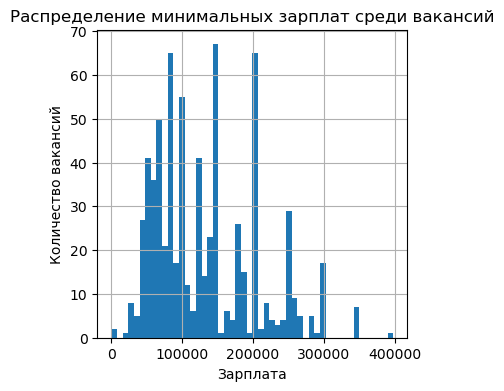

In [ ]:
#строим гистограмму на основе данных из столбца о минимальных зарплатах
df['salary_from'].hist(bins=50, figsize = (4,4))
#указываем название горизонтальной оси
plt.xlabel('Зарплата')
#указываем название вертикальной оси
plt.ylabel('Количество вакансий')
#указываем название графика
plt.title('Распределение минимальных зарплат среди вакансий')
plt.show()

<div class="alert alert-success">

**✅Комментарий ревьюера**

В минимальных ЗП видны аномальные значения, их стоит обработать

</div>


Исследуем данные о максимальных зарплатах.

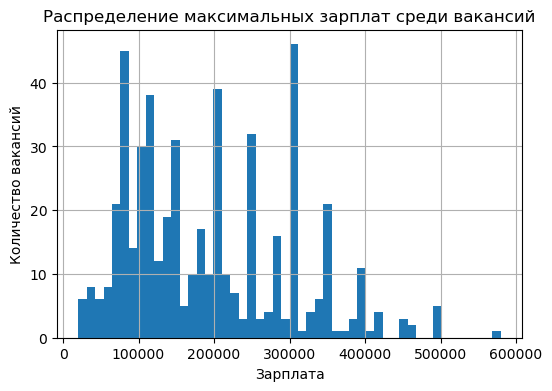

In [ ]:
df['salary_to'].hist(bins=50, figsize = (6,4))
plt.title('Распределение максимальных зарплат среди вакансий')
plt.xlabel('Зарплата')
plt.ylabel('Количество вакансий')
plt.show()

График на гистограмме не похож на нормальное распределение. Много пиков на круглых числах, т.к. зарплата в объявлениях указана в круглых "красивых" числах.

# Определение доли грейдов

Рассмотрим специалистов какого грейда чаще ищут работодатели. Сравним долю грейдов у системных аналитиков и дата аналитиков.

In [ ]:
grades = df.pivot_table(index = 'experience', columns = 'name_binary', values = 'id', aggfunc = 'count')

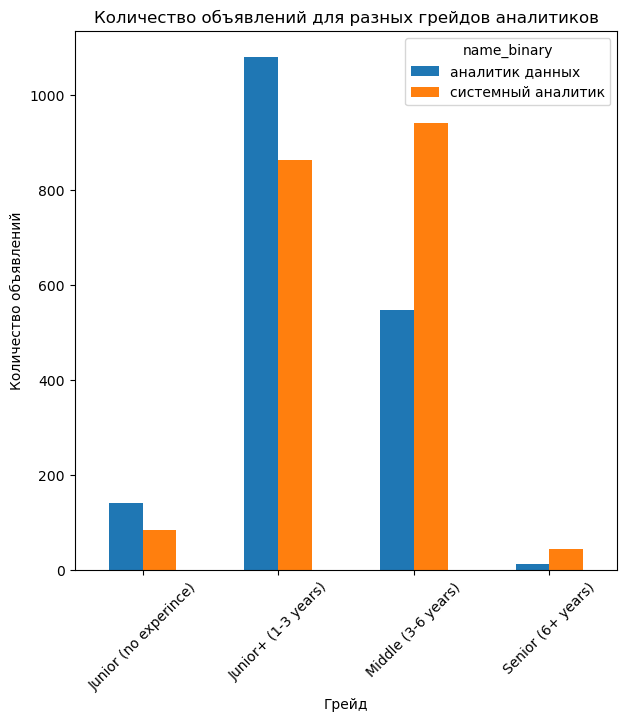

In [ ]:
grades.plot(kind = 'bar',title = 'Количество объявлений для разных грейдов аналитиков',figsize = (7,7))
plt.xlabel('Грейд')
plt.ylabel('Количество объявлений')
plt.tick_params(axis = 'x', rotation = 45)
plt.show()

<div class="alert alert-success">

**✅Комментарий ревьюера**

Было бы хорошо в выводах предположить, почему так мало вакансий для специалистов уровня `Senior`

</div>


В подавляющем большинстве случаев работодатели ищут системных аналитиков и дата аналитиков уровня Junior+ и Middle, однако среди дата аналитиков работодатели чаще ищут специалистов уровня Junior+, чем Middle.
Вакансий для аналитиков грейда Senior довольно мало, что стоит учитывать в дальнейшем анализе.

# Определение типичного места работы

## Определение основных работодателей

Определим топ работодателей для каждой профессии.

Определим топ работодателей для системных аналитиков.

In [ ]:
#переименуем некоторые названия работодателей, чтобы не занимали много места на графике
df['employer'] = df['employer'].replace(['магнит, розничная сеть','центральный банк российской федерации'],['магнит','ЦБ РФ'],regex = True)

In [ ]:
#создаем сводную таблицу, в которой указано количество объявлений для каждого работодателя
top_empls = df.pivot_table(index = 'employer', columns = 'name_binary', values = 'id', aggfunc = 'count')

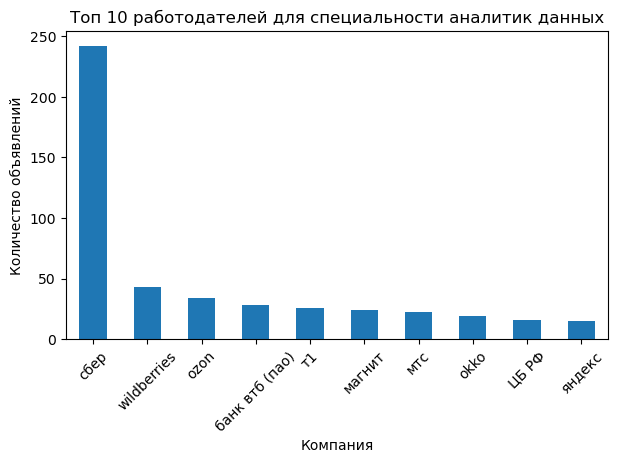

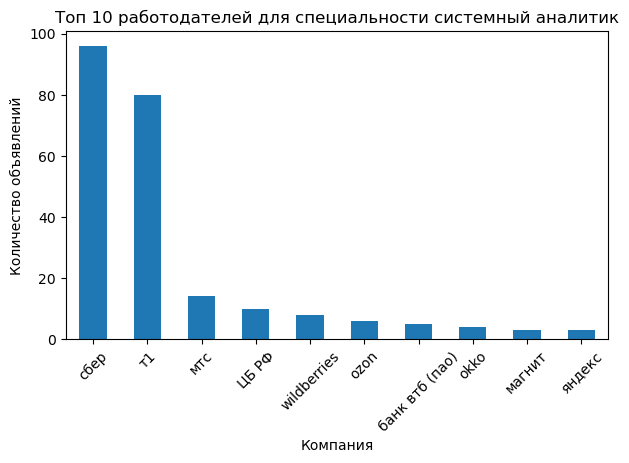

In [ ]:
#чтобы не писать отдельно код для графика каждой специальности, выведем оба графика сразу с помощью цикла
#цикл проходит по столбцам сводной таблицы, для каждой создает переменную "top_empls" с десятью наиболее часто встречаемыми компаниями и строит график
for column in top_empls.columns:
    top_empls = top_empls.sort_values (by = column, ascending = False).head(10)
    top_empls.plot(kind = 'bar', y = column, figsize = (7,4))
    plt.xlabel('Компания')
    plt.ylabel('Количество объявлений')
    #удаляем легенду
    plt.legend().remove()
    #меняем направление текста в названиях столбцов
    plt.tick_params(axis = 'x', rotation = 45)
    plt.title(f'Топ 10 работодателей для специальности {column}')

Компания Сбер оставила больше других объявлений о поиске аналитика данных. Другие работодатели, входящие в топ 10 компаний, ищущих аналитиков даннных представлены на экране.

У системных аналитиков лидируют компании Сбер и Т1. Другие работодатели, входящие в топ 10, представлены на слайде.

Рассмотрим топ работодателей для каждой специальности и каждого грейда отдельно.

In [ ]:
#Создаем отфильтрованный датафрейм с объявлениями только для аналитиков данных
da_filtered = df.query('name_binary == "аналитик данных"')

In [ ]:
da_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1782 entries, 1915 to 3715
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   index                             1782 non-null   int64         
 1   id                                1782 non-null   int64         
 2   name                              1782 non-null   object        
 3   published_at                      1782 non-null   datetime64[ns]
 4   alternate_url                     1782 non-null   object        
 5   type                              1782 non-null   object        
 6   employer                          1782 non-null   object        
 7   department                        520 non-null    object        
 8   area                              1782 non-null   object        
 9   experience                        1782 non-null   object        
 10  key_skills                        1782 non-null   

In [ ]:
da_filtered.head()

,index,id,name,published_at,alternate_url,type,employer,department,area,experience,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_binary
1915,0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,dns головной офис,NaN,Владивосток,Junior (no experince),...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000,<NA>,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,аналитик данных
1916,1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,комус,NaN,Москва,Junior (no experince),...,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,<NA>,<NA>,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,аналитик данных
1917,2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,dns головной офис,NaN,Владивосток,Junior+ (1-3 years),...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000,<NA>,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,аналитик данных
1918,3,100046788,ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,х5 group,"x5 group, центральный офис",Москва,Junior+ (1-3 years),...,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,<NA>,<NA>,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,аналитик данных
1919,4,100056244,аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,лукойл,NaN,Москва,Middle (3-6 years),...,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,<NA>,<NA>,ЗП не указана,NaN,NaN,Документация,аналитик данных


In [ ]:
#заменяем слишком длинные названия работодателей на более компактные
da_filtered.loc[:,'employer'] = da_filtered.loc[:,'employer'].replace(['согласие, страховая компания','гку центр занятости населения города москвы','гкуз ло медицинский информационно-аналитический центр'],['согласие','центр занятости, Москва','мед. аналитический центр'],regex = True)

In [ ]:
#создаем сводную таблицу, в которой указано количество объявлений для каждого работодателя
top_empls_da = da_filtered.pivot_table (index = 'employer', columns = 'experience',values = 'id', aggfunc = 'count')

Отобразим топ 10 компаний для каждого грейда аналитика данных с помощью диаграмм.

<div class="alert alert-success">

**✅Комментарий ревьюера**

Здесь в целом все сделал хорошо, но рекомендую ознакомиться с методом subplot, который позволяет расположить графики сеткой нужного размера. Например, можно было бы построить 4 графика в ряд в 2 ряда

https://teletype.in/@pythontalk/matplotlib_subplot_tutorial

</div>


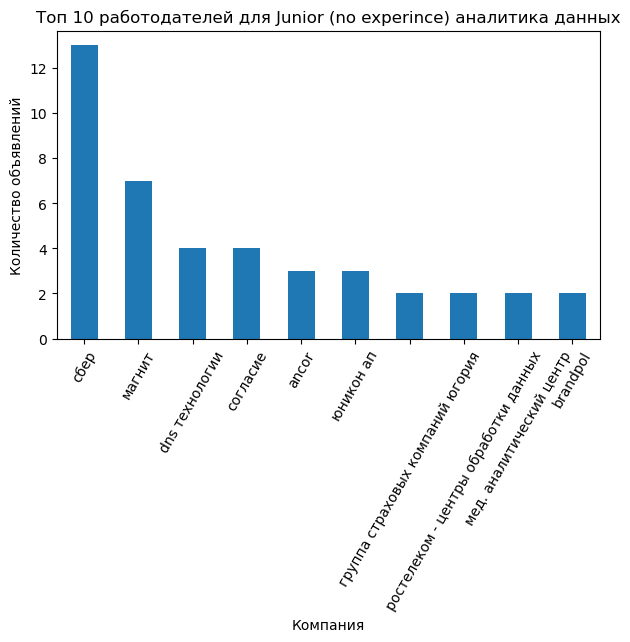

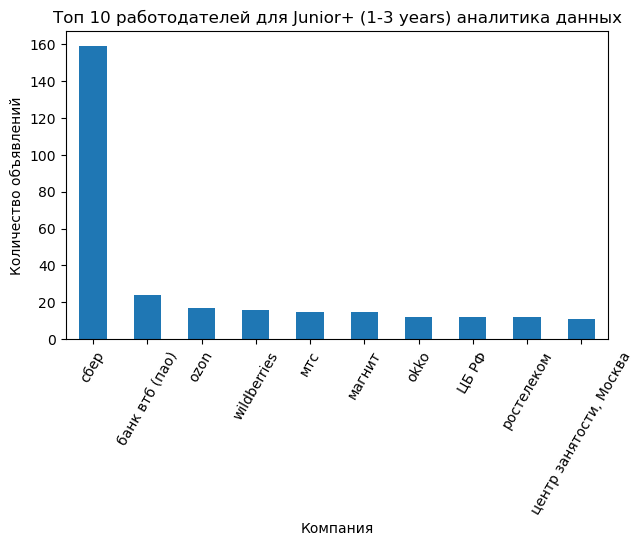

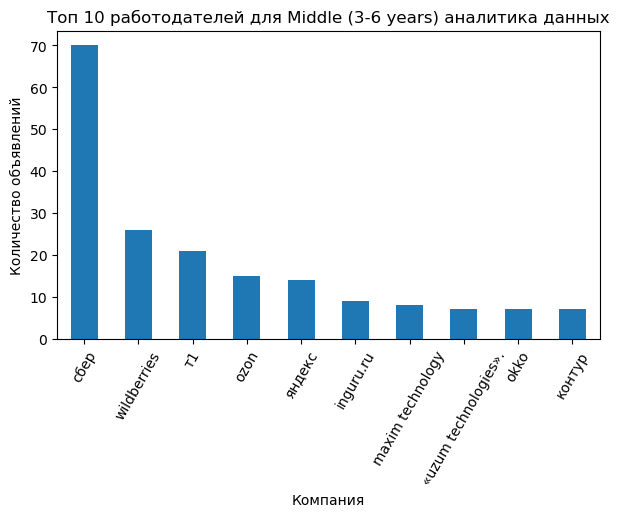

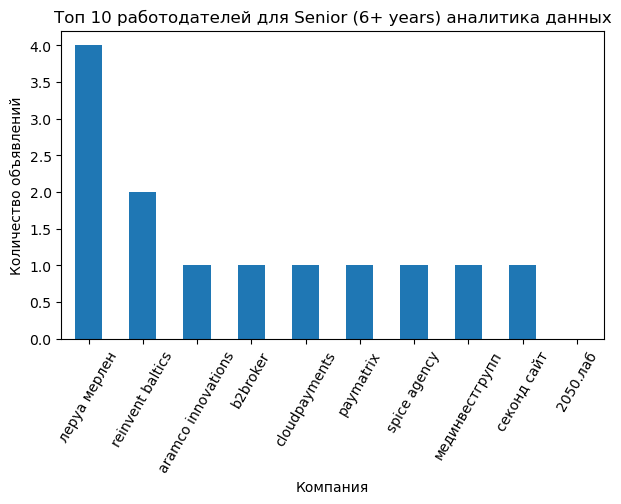

In [ ]:
for column in top_empls_da.columns:
    top_empls_da_by_grade = top_empls_da.sort_values(by = column, ascending = False).head(10)
    top_empls_da_by_grade.plot(kind = 'bar',y = column, figsize = (7,4))
    plt.xlabel('Компания')
    plt.ylabel('Количество объявлений')
    plt.legend().remove()
    plt.tick_params(axis = 'x', rotation = 60)
    plt.title(f'Топ 10 работодателей для {column} аналитика данных')

Компания Сбер лидирует по количеству объявлений для всех грейдов дата аналитиков, кроме senior. Там лидирует Леруа Мерлен. Однако стоит отметить, что количество объявлений для этого грейда довольно маленькое. Другие работодатели, подавшие наибольшое количество объявлений для каждого грейда, представлены на слайде.

Наибольшое количество объявлений представлено для грейдов Junior+ и Middle.

Рассмотрим топ работодателей для каждого грейда у системных аналитиков.

In [ ]:
#создаем отфильтрованную таблицу, куда войдут только объявления для системных аналитиков
sa_filtered = df.query('name_binary == "системный аналитик"')

In [ ]:
#заменяем слишком длинные названия работодателей на более компактные
sa_filtered.loc[:,'employer'] = sa_filtered.loc[:,'employer'].replace(['twiga communication group', 'совкомбанк технологии','красное & белое, розничная сеть','ростелеком информационные технологии','головное подразделение сибагро','бфт-холдинг (бюджетные и финансовые технологии)'],['twiga','совкомбанк','красное & белое','ростелеком','сибагро','бфт-холдинг'],regex = True)

In [ ]:
sa_filtered.loc[:,'employer'] = sa_filtered.loc[:,'employer'].replace(['компания апогей (1с-франчайзи)','бфт-холдинг (бюджетные и финансовые технологии)','псб (пао «промсвязьбанк»)'],['апогей','бфт-холдинг','ПСБ'])

In [ ]:
top_empls_sa = sa_filtered.pivot_table (index = 'employer', columns = 'experience',values = 'id', aggfunc = 'count')

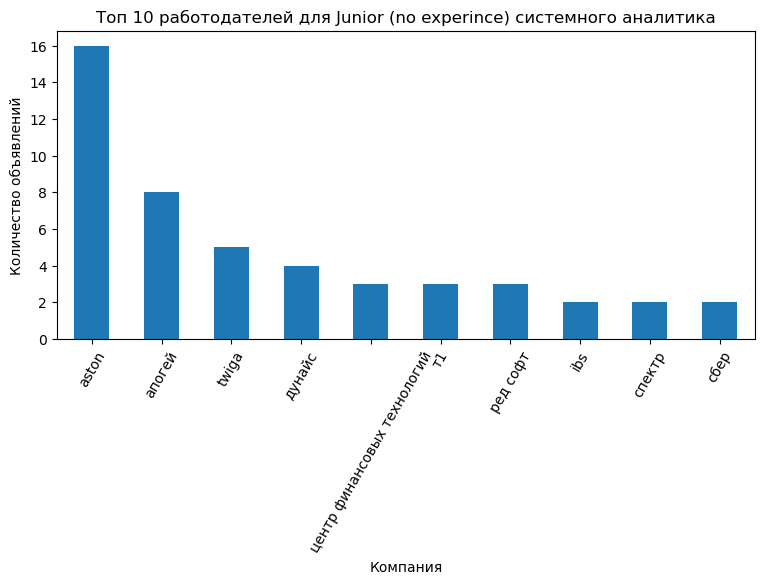

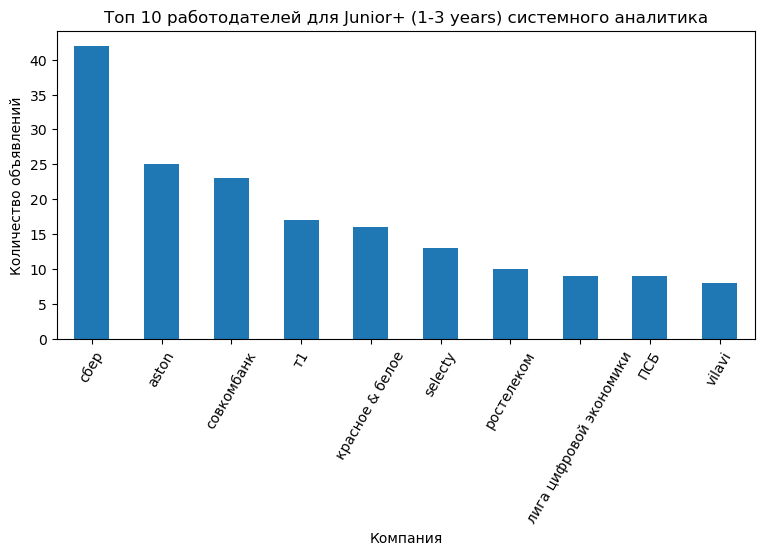

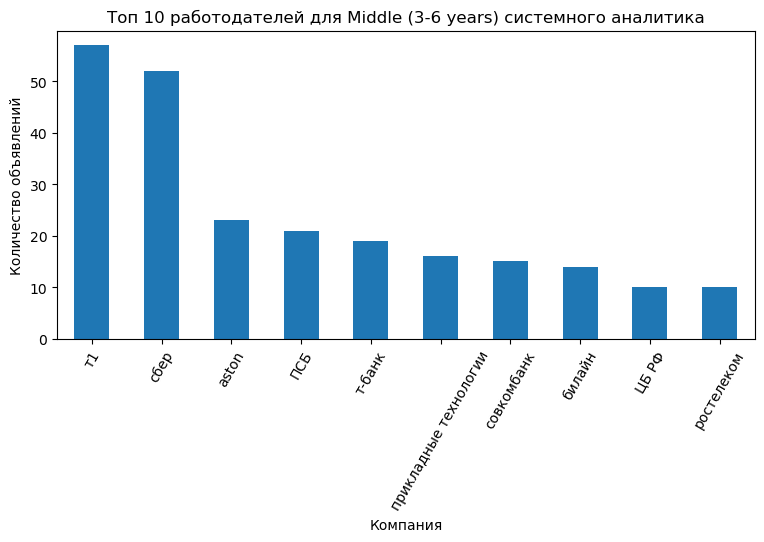

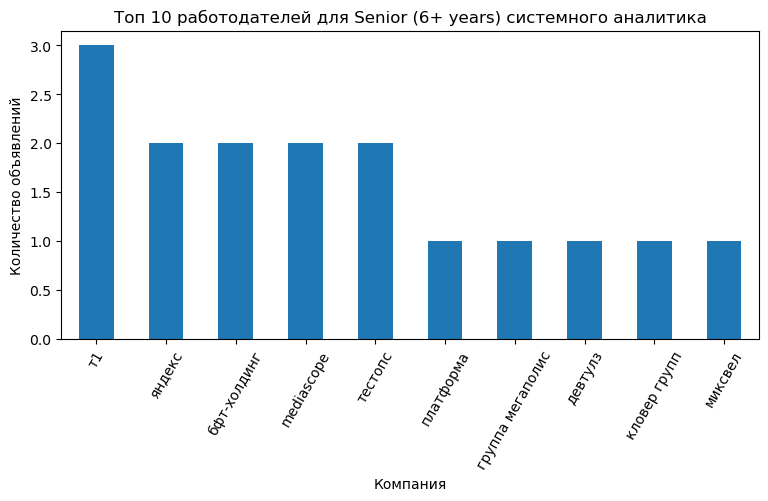

In [ ]:
for column in top_empls_sa.columns:
    top_empls_sa_by_grade = top_empls_sa.sort_values(by = column, ascending = False).head(10)
    top_empls_sa_by_grade.plot(kind = 'bar',y = column, figsize = (9,4))
    plt.xlabel('Компания')
    plt.ylabel('Количество объявлений')
    plt.legend().remove()
    plt.tick_params(axis = 'x', rotation = 60)
    plt.title(f'Топ 10 работодателей для {column} системного аналитика')

Для системных аналитиков без опыта лидируют компании Aston, Апогей, Twiga и другие (представлены на графике).
Для грейда Junior+: компании Сбер, Aston, Совкомбанк. Объявлений о поиске системных аналитиков уровня Middle больше всего подали Т1, Сбер, ПСБ. Сеньоров чаще всего ищет компания Т1, однако объявлений для поиска данного грейда слишком мало.

## Определение зарплат

Проанализируем зарплаты для двух профессий. В датасете зарплата представлена в 3-х столбцах: категория ЗП, минимальная ЗП, максимальная ЗП. Исследуем каждый из них.

Начнем с категорий заработной платы.

Создадим сводную таблицу, в которой указано количество объявлений для каждой категории ЗП для каждой специальности. На ее основе построим график.

In [ ]:
salary_bin_pivot = df.pivot_table (index = 'salary_bin', columns = 'name_binary', values = 'id', aggfunc = 'count')
salary_bin_pivot = salary_bin_pivot.sort_values (by = 'системный аналитик', ascending = False)

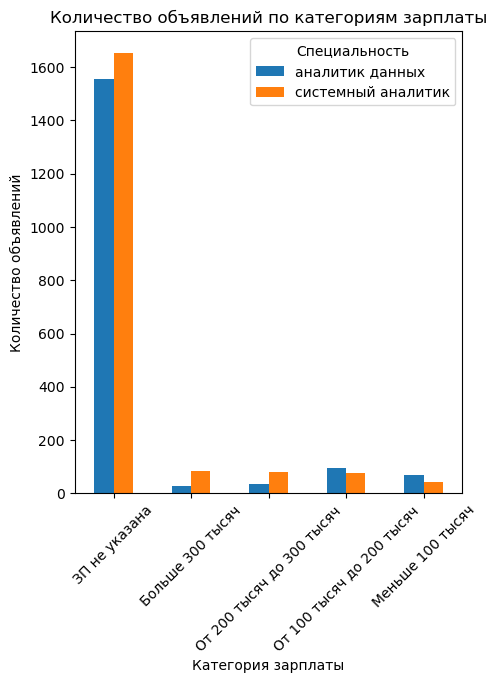

In [ ]:
salary_bin_pivot.plot (kind = 'bar', figsize = (5,6))
plt.xlabel('Категория зарплаты')
plt.ylabel('Количество объявлений')
plt.legend(title = 'Специальность')
plt.tick_params (axis = 'x', rotation = 45)
plt.title ('Количество объявлений по категориям зарплаты')
plt.show()

В подавляющем большинстве случаев работодатель не указывает категорию ЗП. Из тех объявлений, где категория указана, наблюдаем следующую картину: зарплаты более 200 тыс. чаще предлагают системным аналитикам, аналитикам данных чаще предлагают зарплаты менее 200 тыс.

Проанализируем зарплаты отдельно для каждого грейда.

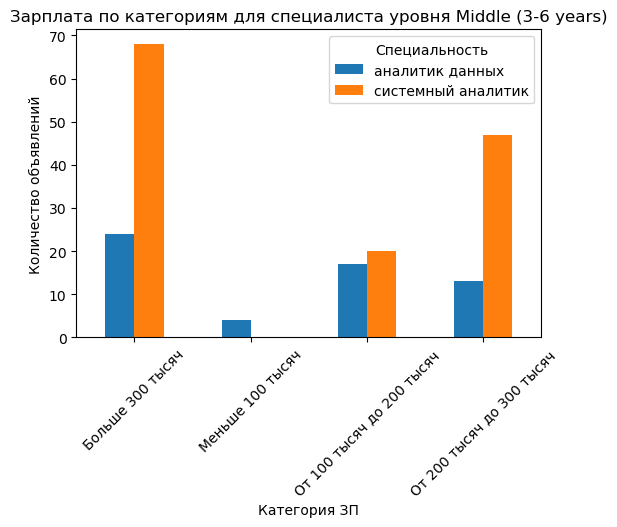

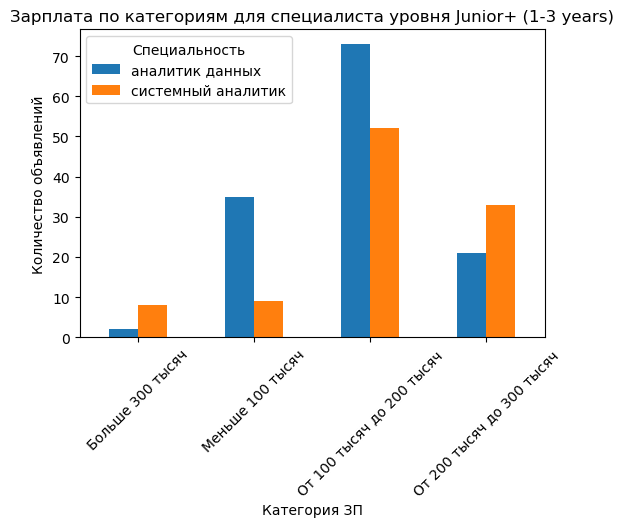

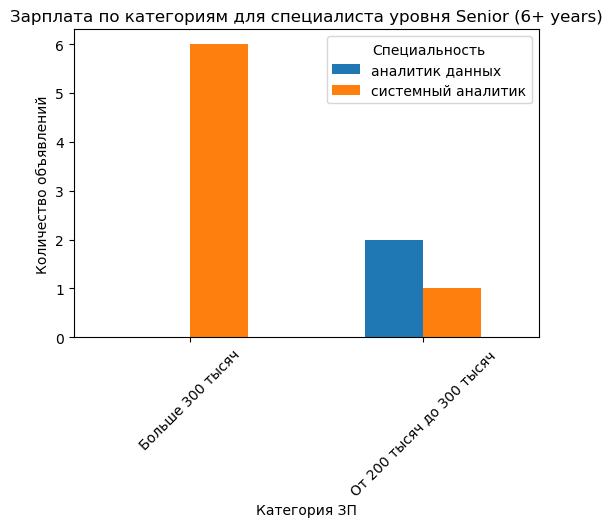

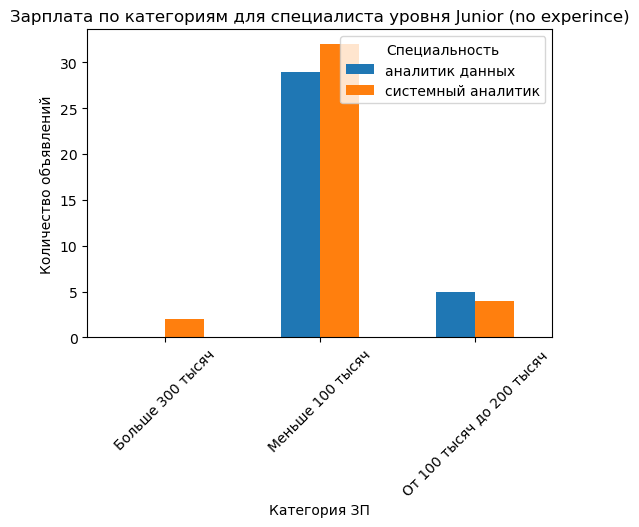

In [ ]:
for e in df['experience'].unique():
    #в каждой итерации цикла создаем датафрейм df_filtered_by_grade, отфильтрованный по каждому грейду отдельно и в который входят только вакансии с
#указанными категориями ЗП
    df_filtered_by_grade = df[(df['experience']==e) & (df['salary_bin']!='ЗП не указана')]
    salary_by_grade = df_filtered_by_grade.pivot_table(index = 'salary_bin', columns = 'name_binary', values = 'id', aggfunc = 'count')
    salary_by_grade.plot(kind = 'bar',figsize = (6,4))
    plt.xlabel('Категория ЗП')
    plt.ylabel('Количество объявлений')
    plt.legend (title = 'Специальность')
    plt.tick_params (axis = 'x', rotation = 45)
    plt.title(f'Зарплата по категориям для специалиста уровня {e}')

Для специалистов без опыта в основном предлагают зарплату менее 100 тыс. рублей.

Специалистам уровня Junior+ в большинстве случаев предлагают зарплату от 100 до 200 тыс. рублей для обеих профессий. Однако системным аналитикам данного грейда предлагают ЗП от 200 до 300 тыс. рублей чаще, чем ЗП менее 100 тыс. У Junior+ дата аналитиков наоборот объявлений с предлагаемой ЗП менее 100 тыс. больше, чем с ЗП от 200 до 300 тыс. рублей. Специалистам такого уровня редко предлагают зарплату выше 300 тыс. рублей, а если и предлагают, то чаще всего системным аналитикам.

"Миддлам" чаще всего работодатели предлагают зарплату выше 300 тысяч рублей. Однако, вторая по популярности категория ЗП для дата аналитиков данной категории - от 100 до 200 тыс. рублей, тогда как для системных аналитиков - от 200 до 300 тыс. рублей.

В датасете мало объявлений для специалистов уровня Senior с указанной категорией ЗП. Из тех данных что у нас есть, мы видим, что им не предлагают зарплаты менее 200 тыс. рублей, а ЗП более 300 тыс. рублей имеют только системные аналитики.

Проанализируем минимальную предлагаемую зарплату среди аналитиков.

In [ ]:
#во избежание искажения результатов, отфильтруем датафрейм, чтобы в него не вошли нулевые значения в столбце с минимальной ЗП
df_sf_filtered = df[df['salary_from']>0]

In [ ]:
#проверяем сработала ли фильтрация
df_sf_filtered['salary_from'].min()

50

Сравним распределение минимальных предлагаемых зарплат на диаграмме "ящик с усами".

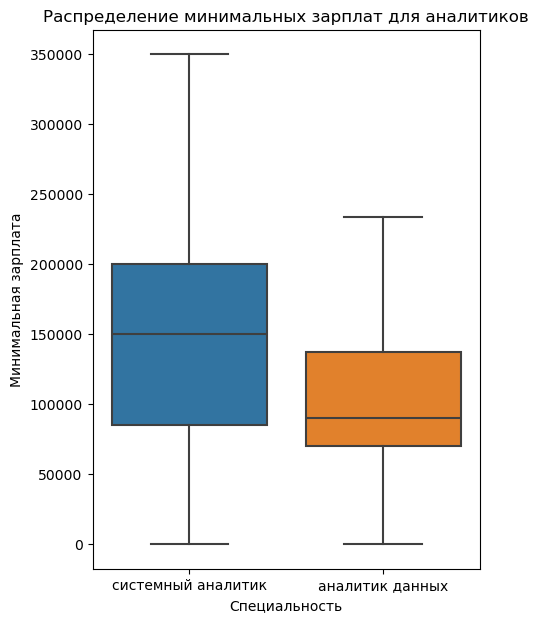

In [ ]:
plt.figure(figsize = (5,7))
ax=sns.boxplot(x='name_binary',y='salary_from', data=df_sf_filtered, showfliers = False)
plt.xlabel('Специальность')
plt.ylabel('Минимальная зарплата')
plt.title ('Распределение минимальных зарплат для аналитиков')
plt.show()

Минимальные зарплаты, предлагаемые системным аналитикам выше, чем минимальные зарплаты аналитиков данных. Медианная минимальная предлагаемая зарплата системного аналитика составляет 150 тыс. рублей, для дата аналитиков эта цифра составляет около 100 тыс. рублей.

Проанализируем зарплаты для каждого грейда отдельно

<div class="alert alert-success">

**✅Комментарий ревьюера**

отличный вариант, чтобы построить боксплоты в разбивке по профессиям и грейдам

</div>


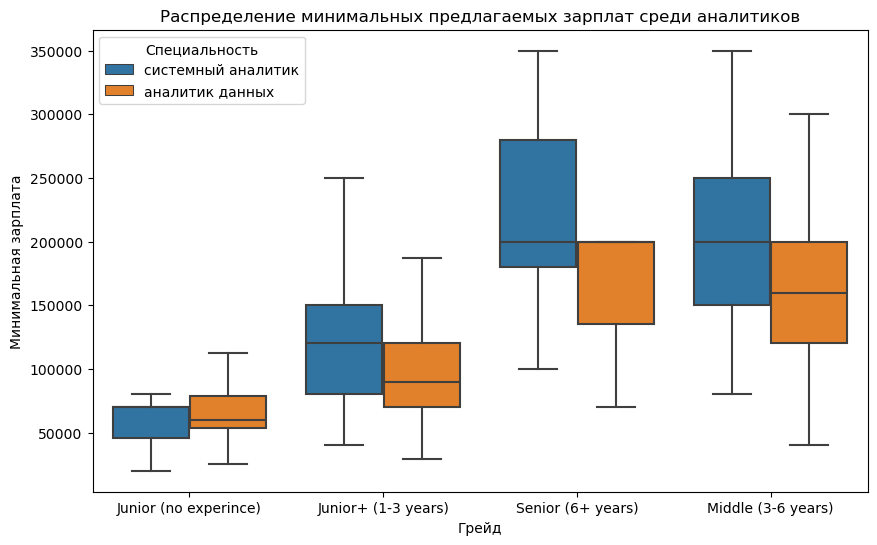

In [ ]:
plt.figure(figsize = (10,6))
#сортировка графиков по возрастанию медианы
ranks = df.groupby(['experience'])['salary_from'].median().fillna(0).sort_values(ascending = False)[::-1].index
sns.boxplot(data = df_sf_filtered, x='experience', y = 'salary_from', hue = 'name_binary', showfliers = False, order = ranks)
plt.xlabel ('Грейд')
plt.ylabel('Минимальная зарплата')
plt.legend(title = 'Специальность')
plt.title('Распределение минимальных предлагаемых зарплат среди аналитиков')
plt.show()

Самые низкие минимальные ЗП предлагают специалистам без опыта: в основном чуть выше 50 тыс. рублей.

Специалистам уровня Junior+ предлагают более высокие минимальные зарплаты. При этом ЗП системных аналитиков данного грейда выше: их медианная минимальная ЗП находится в районе 100-150 тыс. рублей, медианная минимальная ЗП Junior+ аналитиков данных: чуть менее 100 тыс. рублей.

Медианная минимальная зарплата Middle дата аналитиков находится на уровне 150 тыс. рублей, для Middle системных аналитиков это значение находится на уровне 200 тыс. рублей.

Больших отличий в уровне минимальной зарплаты для специалистов уровня Senior по сравнению со специалистами уровня Middle не обнаружено. Возможно из-за недостаточного количества данных.

Проанализируем максимальную зарплату среди аналитиков.

In [ ]:
#фильтрация нулевых значений
df_st_filtered = df[df['salary_to']>0]

In [ ]:
df_st_filtered['salary_to'].min()

20000

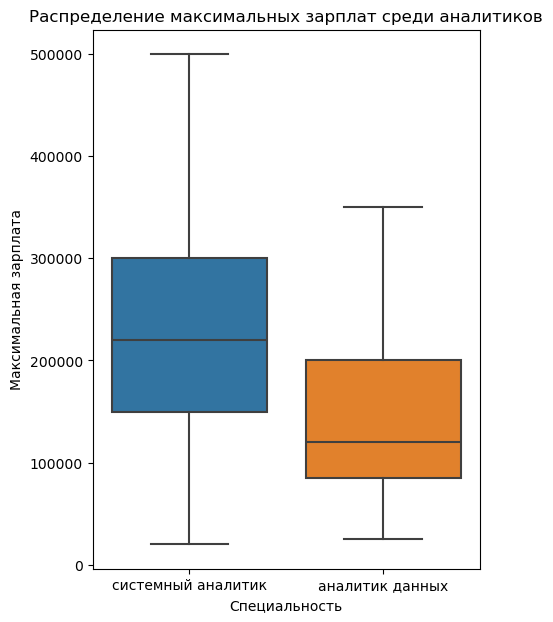

In [ ]:
plt.figure(figsize = (5,7))
ax=sns.boxplot(x='name_binary',y='salary_to', data=df_st_filtered, showfliers = False)
plt.title ('Распределение максимальных зарплат среди аналитиков')
plt.xlabel('Специальность')
plt.ylabel('Максимальная зарплата')
plt.show()

Максимальные предлагаемые зарплаты для системных аналитиков также выше. Для них медиана находится чуть выше 200 тыс. рублей, для дата аналитиков она находится чуть выше 100 тыс. рублей.

Сравним зарплаты по грейдам.

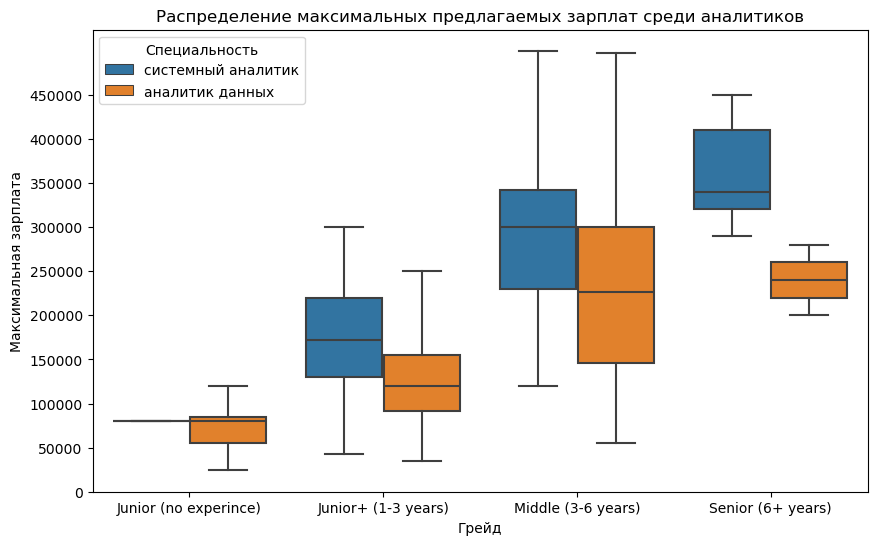

In [ ]:
plt.figure(figsize = (10,6))
ranks = df.groupby(['experience'])['salary_to'].median().fillna(0).sort_values(ascending = False)[::-1].index
sns.boxplot(data = df_st_filtered, x='experience', y = 'salary_to', hue = 'name_binary', showfliers = False, order = ranks)
plt.xlabel ('Грейд')
plt.ylabel('Максимальная зарплата')
plt.legend(title = 'Специальность')
plt.title('Распределение максимальных предлагаемых зарплат среди аналитиков')
plt.yticks(np.arange(0,500000,50000))
plt.show()

Объявлений с указанной информацией о максимальной ЗП для системных аналитиков без опыта практически нет. Медиана макcимальной предлагаемой зарплаты для дата аналитиков находится на отметке чуть ниже 100 тыс. рублей.

Системным аналитикам уровня Junior+ предлагают потолок зарплаты с медианой на уровне 150-200 тыс. рублей. Максимальная медианная зарплата аналитиков данных находится на уровне 100-150 тыс. рублей.

Системным аналитикам уровня Middle предлагают максимальную зарплату с медианой в 300 тыс. рублей. У дата аналитиков уровня Middle довольно большой межквартильный размах (от 150 до 300 тыс. рублей) с медианой на уровне 200-250 тыс. рублей.

Предлагаемый потолок зарплаты для системных аналитиков уровня Senior находится, в основном, на уровне 300-400 тыс. рублей (медиана примерно на 325 тыс.). Медианные максимальные зарплаты Senior дата аналитиков практически не отличаются  зарплат уровня Middle. При этом  "сеньорам" практически не предлагают зарплаты более 300 тыс. рублей, в отличии от "миддлов".

Таким образом, можно сделать вывод, что зарплаты системных аналитиков выше, чем дата аналитиков.

## Определение типа занятости

Создадим сводную таблицу, в которой будет указано количество вакансий для каждого типа занятости для каждой специальности. На ее основе создадим график.

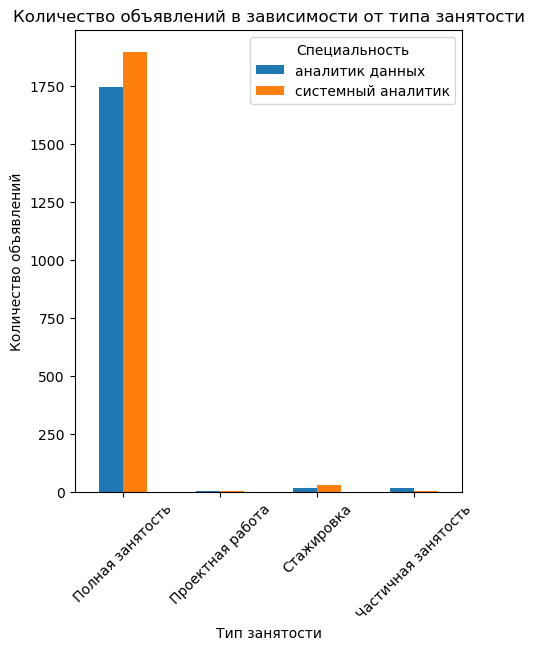

In [ ]:
employment_pivot = df.pivot_table(index = 'employment', columns = 'name_binary', values = 'id', aggfunc = 'count')
employment_pivot.plot (kind = 'bar', figsize = (5,6))
plt.title('Количество объявлений в зависимости от типа занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Количество объявлений')
plt.legend (title = 'Специальность')
plt.tick_params (axis = 'x', rotation = 45)
plt.show()

Подавляющее число работодателей ищет соискателей на полную занятость для обеих профессий.

Сравним количество объявлений по типу занятости для каждого грейда отдельно.

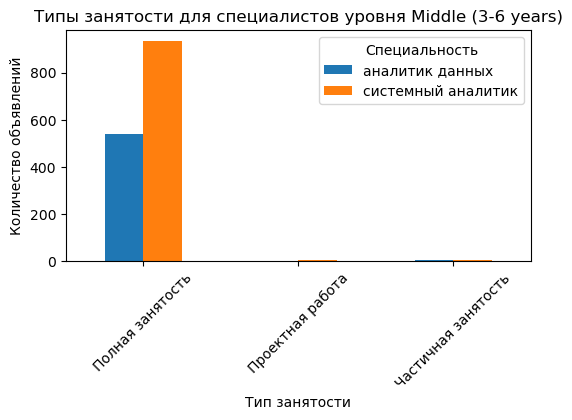

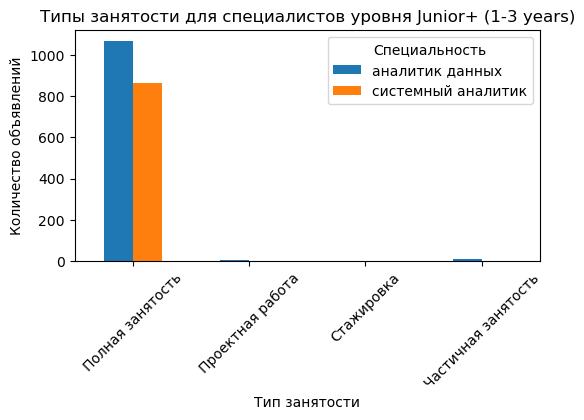

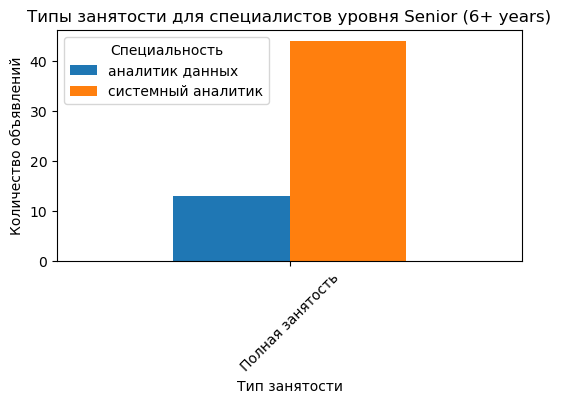

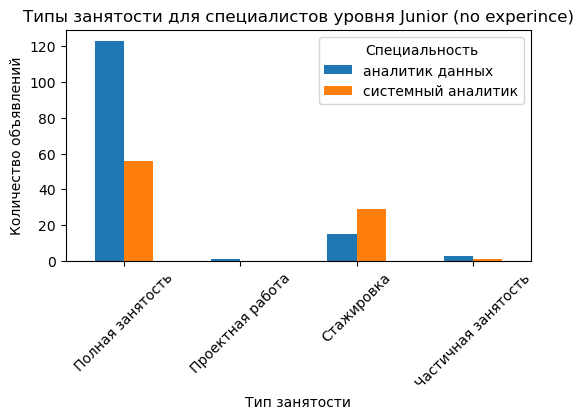

In [ ]:
for e in df['experience'].unique():
    df_filtered_by_grade = df[df['experience']==e]
    employment_by_grade = df_filtered_by_grade.pivot_table(index = 'employment', columns = 'name_binary', values = 'id', aggfunc = 'count')
    employment_by_grade.plot(kind = 'bar',figsize = (6,3))
    plt.xlabel('Тип занятости')
    plt.ylabel('Количество объявлений')
    plt.legend (title = 'Специальность')
    plt.tick_params (axis = 'x', rotation = 45)
    plt.title(f'Типы занятости для специалистов уровня {e}')

В целом, та же картина: работодатели в подавляющем большинстве случаев ищут соискателей на полную занятость. Однако здесь мы также можем увидеть, что специалистам без опыта часто предлагают стажировку, причем системным аналитикам вдвое чаще, чем дата аналитикам.

## Определение графиков работы

Создадим сводную таблицу, в которой будет указано количество вакансий для каждого графика работы для каждой специальности. На ее основе построим график.

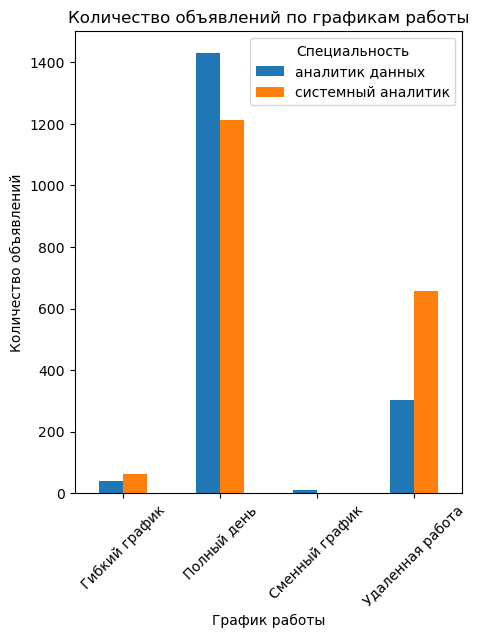

In [ ]:
schedule_pivot = df.pivot_table(index = 'schedule', columns = 'name_binary', values = 'id',aggfunc = 'count')
schedule_pivot.plot(kind = 'bar', figsize = (5,6))
plt.xlabel('График работы')
plt.ylabel('Количество объявлений')
plt.legend(title = 'Специальность')
plt.title('Количество объявлений по графикам работы')
plt.tick_params (axis = 'x', rotation = 45)
plt.show()

Работодатели в первую очередь ищут сотрудников, которые будут уделять работе весь рабочий день. При этом системным аналитикам проще найти удаленную работу, чем дата аналитикам.

Сравним графики по грейдам.

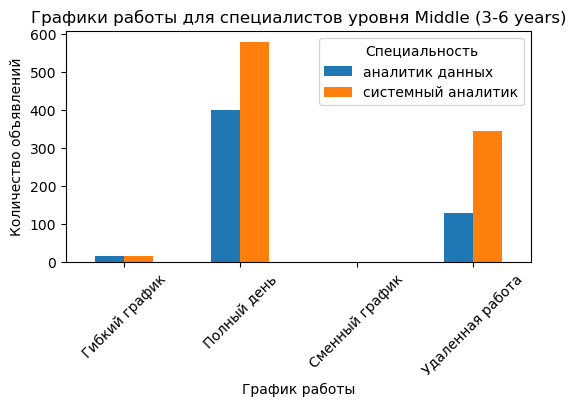

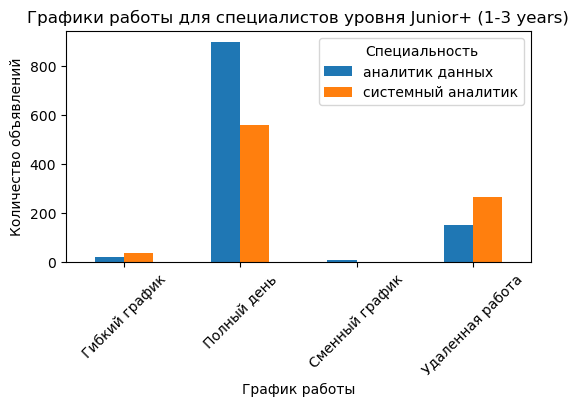

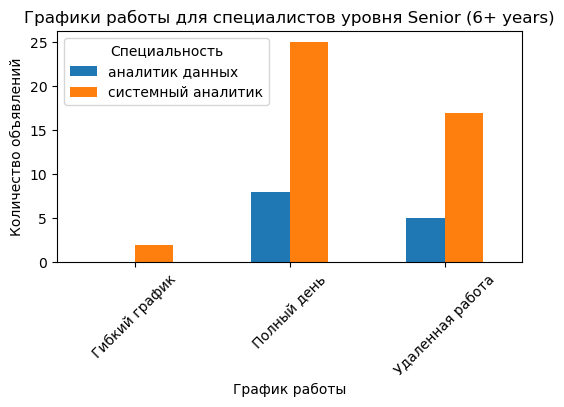

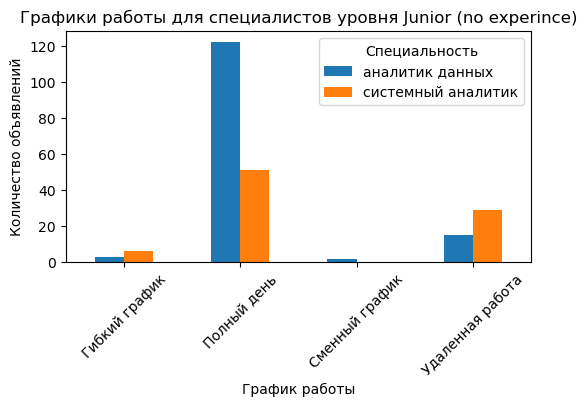

In [ ]:
for e in df['experience'].unique():
    df_filtered_by_grade = df[df['experience']==e]
    schedule_by_grade = df_filtered_by_grade.pivot_table(index = 'schedule', columns = 'name_binary', values = 'id', aggfunc = 'count')
    schedule_by_grade.plot(kind = 'bar',figsize = (6,3))
    plt.xlabel('График работы')
    plt.ylabel('Количество объявлений')
    plt.legend (title = 'Специальность')
    plt.tick_params (axis = 'x', rotation = 45)
    plt.title(f'Графики работы для специалистов уровня {e}')

Работодатели в большинстве случаев требуют от соискателей работать полный рабочий день на месте работы, однако на рынке труда немало предложений по удаленной работе.
Предложений с гибким и сменным графиком очень мало.

Таким образом типичным местом работы для аналитика данных будет работа на полную занятость и полный рабочий день в таких компаниях как Сбер, Т1 и другие. Заработная плата будет отличаться в зависимости от опыта. Для специалистов без опыта она будет в районе 50-80 тысяч рублей. Для специалистов уровня Junior+ она будет в районе 100 тыс. рублей. Для специалистов уровня Middle она составит 150-250 тыс. рублей. Данных для специалистов уровня Senior очень мало для формирования выводов.

Типичным местом работы для системного аналитика будет работа на полную занятость и полный рабочий день в таких компаниях как Сбер, Т1, МТС и другие. Заработная плата также отличается в зависимости от опыта. Для специалистов уровня Junior+ она составит свыше 100-150 тыс. рублей. Для специалистов уровня Middle она составит 200-300 тыс. рублей. Для формирования выводов об уровне ЗП для специалистов уровня Senior и без опыта недостаточно данных.

# Определение доли навыков

Определим для каждой специальности какие из 2-х категорий навыков (hard skills и soft skills) спрашивают чаще.

Чтобы узнать какие навыки спрашивают чаще, нужно провести категоризацию данных, а именно указать какие из навыков относятся к "мягким", а какие к "жестким".
Получим список навыков из столбца "key_skills" с помощью функции .explode().

<div class="alert alert-success">

**✅Комментарий ревьюера**

Можно выполнить замену символов одним вызовом функции `replace`

`.str.replace("\[|\]|\'",'', regex=True)`

</div>


In [ ]:
#очистим значения столбца от лишних символов
df.loc[:,'key_skills'] = df.loc[:,'key_skills'].str.replace('[','').str.replace(']','').str.replace("'",'').str.strip()

In [ ]:
#превращаем каждое значение ячейки в список, каждый элемнт которого разделен запятой
df.loc[:,'key_skills'] = df.loc[:,'key_skills'].str.split(',')

In [ ]:
df.loc[:,'key_skills']

0       [1с,  аналитический склад ума,  confluence,  sql]
1       [разработка технических заданий,  бизнес-анали...
2                                          [документация]
3       [erp,  atlassian jira,  1с: управление произво...
4       [json,  sql,  xml,  soap,  html,  js,  java,  ...
                              ...                        
3711    [проактивность,  коммуникация,  sql,  ad-hoc, ...
3712    [грамотная речь,  сводные таблицы,  сбор и ана...
3713    [анализ данных,  sql,  ms power bi,  python,  ...
3714    [анализ данных,  sql,  ms power bi,  python,  ...
3715    [анализ данных,  sql,  ms power bi,  python,  ...
Name: key_skills, Length: 3716, dtype: object

Значения столбца представлены в виде списка, каждый навык в котором составляет отдельный элемент списка.

In [ ]:
#применяем функцию .explode() и сохраняем в новую переменную куда войдет всего 2 столбца от изначального датафрейма для экономии ресурсов
df_exploded = df[['id','experience','key_skills','name_binary']].explode('key_skills')

In [ ]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20568 entries, 0 to 3715
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           20568 non-null  int64 
 1   experience   20568 non-null  object
 2   key_skills   20568 non-null  object
 3   name_binary  20568 non-null  object
dtypes: int64(1), object(3)
memory usage: 803.4+ KB


Теперь благодаря функции .explode() каждый навык представлен в отдельной строке

Проверим работу функции и количество значений навыков.

In [ ]:
df_exploded['key_skills'].value_counts()

key_skills
 sql                                  1211
 документация                         1179
 bpmn                                  653
 python                                558
 аналитическое мышление                557
                                      ... 
 swot-анализ                             1
 аудит бизнес-процессов                  1
 разработка бизнес-плана                 1
 системное тестирование                  1
 контрольно-аналитические проверки       1
Name: count, Length: 1698, dtype: int64

У некоторых навыков есть пробелы в начале. Уберем их.

In [ ]:
df_exploded['key_skills'] = df_exploded['key_skills'].str.strip()

In [ ]:
df_exploded['key_skills'].value_counts()

key_skills
документация                         1571
sql                                  1438
confluence                            699
аналитическое мышление                658
bpmn                                  656
                                     ... 
нефункциональные требования             1
open source                             1
xslt                                    1
restful api                             1
контрольно-аналитические проверки       1
Name: count, Length: 1520, dtype: int64

<div class="alert alert-success">

**✅Комментарий ревьюера**

молодец, получил верный список уникальных навыков

</div>


От пробелов избавились.

Всего в датафрейме представлено 1520 уникальных навыков, что довольно много. Оставим выборку из 100 наиболее часто встречаемых из них для системных аналитиков и аналитиков данных.

In [ ]:
df_exploded_sa = df_exploded.query('name_binary == "системный аналитик"')

In [ ]:
len(df_exploded_sa)

12116

In [ ]:
#создаем сводную таблицу, в которой подсчитывается в скольких объявлениях встречается тот или иной навык
skills_sa = df_exploded_sa.pivot_table(index = 'key_skills', values = 'id', aggfunc = 'count').reset_index()

In [ ]:
#отбираем 100 самых часто встречаемых навыков
top_skills_sa = skills_sa.sort_values(by = 'id', ascending = False).head(100).reset_index()
#выводим их значения
top_skills_sa['key_skills'].unique()

array(['документация', 'sql', 'bpmn', 'confluence', 'системный анализ',
       'uml', 'rest', 'аналитическое мышление', 'коммуникация', 'soap',
       'разработка технических заданий', 'постановка задач разработчикам',
       'xml', 'api', 'бизнес-анализ', 'atlassian jira', 'json', '',
       'atlassian confluence', 'json api', 'postgresql', 'kafka',
       'ms sql', 'моделирование бизнес процессов', 'аналитика',
       'базы данных', 'rest api', 'scrum', 'работа с базами данных',
       'анализ данных', 'системная интеграция',
       'техническая документация', 'оптимизация бизнес-процессов',
       'agile', 'xsd', 'проактивность', 'python', 'dwh',
       'работа с большим объемом информации', 'postman', 'rabbitmq',
       'agile project management', 'переговоры', 'субд',
       'erp-системы на базе 1с', 'анализ требований', 'ms visio',
       'oracle', 'системное мышление', 'swagger', 'git',
       'system analysis', 'английский язык', 'сбор и анализ информации',
       'apache kafka

В данном списке есть пустое значение. Избавимся от него.

In [ ]:
skills_sa = skills_sa.query('key_skills!=""')
top_skills_sa = skills_sa.sort_values(by = 'id', ascending = False).head(100).reset_index()
top_skills_sa['key_skills'].unique()

array(['документация', 'sql', 'bpmn', 'confluence', 'системный анализ',
       'uml', 'rest', 'аналитическое мышление', 'коммуникация', 'soap',
       'разработка технических заданий', 'постановка задач разработчикам',
       'xml', 'api', 'бизнес-анализ', 'atlassian jira', 'json',
       'atlassian confluence', 'json api', 'postgresql', 'kafka',
       'ms sql', 'аналитика', 'моделирование бизнес процессов',
       'rest api', 'базы данных', 'scrum', 'анализ данных',
       'работа с базами данных', 'системная интеграция',
       'техническая документация', 'agile',
       'оптимизация бизнес-процессов', 'xsd', 'проактивность', 'python',
       'dwh', 'работа с большим объемом информации', 'postman',
       'rabbitmq', 'agile project management', 'переговоры',
       'erp-системы на базе 1с', 'анализ требований', 'субд', 'ms visio',
       'oracle', 'системное мышление', 'swagger', 'английский язык',
       'system analysis', 'git', 'сбор и анализ информации',
       'apache kafka', '

Теперь пустого значения нет.

Проведем категоризацию навыков. Для этого создадим функцию, которая в зависимости от значения определяет навык как "мягкий" или "жесткий".

In [ ]:
def categorize_skills_sa(row):
    if 'документация' in row or 'аналитическое мышление' in row or 'коммуникация' in row or 'работа с большим объемом информации' in row or 'проактивность' in row or 'переговоры' in row or 'мышление' in row or 'английский' in row or 'в команде' in row or 'склад ума' in row or 'коммуникация' in row or 'системный подход' in row or 'организаторские навыки' in row or 'ответственность' in row:
        return 'Soft skills'
    else: return 'Hard skills'

<div class="alert alert-success">

**✅Комментарий ревьюера**

Молодец, что категоризовал навыки

</div>


In [ ]:
#применяем функцию к столбцу со 100 наиболее встречаемыми навыками
top_skills_sa['category'] = top_skills_sa['key_skills'].apply(categorize_skills_sa)

In [ ]:
#проверяем работу функции
top_skills_sa.head()

,index,key_skills,id,category
0,618,документация,1304,Soft skills
1,408,sql,678,Hard skills
2,96,bpmn,636,Hard skills
3,122,confluence,581,Hard skills
4,870,системный анализ,570,Hard skills


Навыки категоризованы на "мягкие" и "жесткие".

In [ ]:
#Посчитаем сколько в сумме приходится объявлений для каждой категории навыка, а также сколько в среднем приходится объявлений
#на каждый навык из категории с помощью сводной таблицы
skills_sa_pivot = top_skills_sa.pivot_table(index = 'category', values = 'id', aggfunc = ['mean','sum'])

Визуализируем данные с помощью графиков.

Посмотрим на столбчатой диаграмме сколько объявлений приходится в среднем на навык из каждой категории.

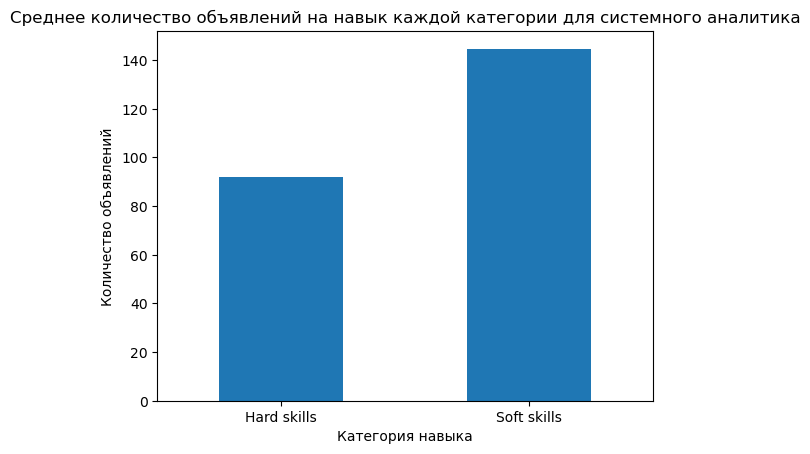

In [ ]:
skills_sa_pivot.plot(kind = 'bar', y = ('mean','id'))
plt.xlabel('Категория навыка')
plt.ylabel('Количество объявлений')
plt.legend().remove()
plt.tick_params(axis = 'x', rotation = 0)
plt.title('Среднее количество объявлений на навык каждой категории для системного аналитика')
plt.show()

В среднем, каждый hard skill системного встречается в датафрейме чуть менее 100 раз, а каждый soft skill - менее 140.

Посмотрим долю каждой категории навыков системных аналитиков в датафрейме.

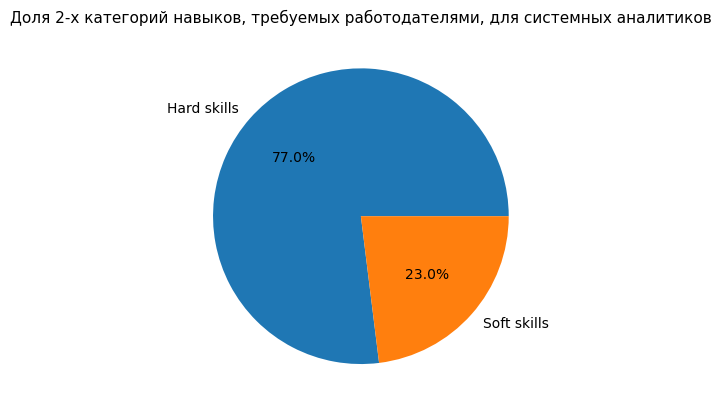

In [ ]:
skills_sa_pivot.plot(kind = 'pie', y = ('sum','id'), autopct='%1.1f%%')
plt.ylabel('')
plt.legend().remove()
plt.title('Доля 2-х категорий навыков, требуемых работодателями, для системных аналитиков', fontsize = 11)
plt.show()

Примерно 3/4 навыков, требуемых работодателями в датафрейме, относятся к hard skills, 1/4 - к soft skills.

Полученные результаты говорят о том, что, несмотря на большое количество различных "жестких" навыков, "мягкие" навыки также имеют очень большое значение для системных аналитиков.

Теперь сделаем то же самое для аналитиков данных.

In [ ]:
df_exploded_da = df_exploded.query('name_binary == "аналитик данных"')

In [ ]:
len(df_exploded_da)

8452

In [ ]:
df_exploded_da['key_skills'].value_counts()

key_skills
sql                                             760
python                                          577
анализ данных                                   405
                                                380
аналитическое мышление                          364
                                               ... 
оперативный поиск информации в сети интернет      1
проведение телефонных интервью                    1
контроль и анализ ценообразования                 1
aiohttp                                           1
контрольно-аналитические проверки                 1
Name: count, Length: 786, dtype: int64

In [ ]:
df_exploded_da['key_skills'] = df_exploded_da['key_skills'].str.strip()

C:\Users\Ilya\AppData\Local\Temp\ipykernel_13160\631709593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exploded_da['key_skills'] = df_exploded_da['key_skills'].str.strip()


In [ ]:
df_exploded_da['key_skills'].value_counts()

key_skills
sql                                             760
python                                          577
анализ данных                                   405
                                                380
аналитическое мышление                          364
                                               ... 
оперативный поиск информации в сети интернет      1
проведение телефонных интервью                    1
контроль и анализ ценообразования                 1
aiohttp                                           1
контрольно-аналитические проверки                 1
Name: count, Length: 786, dtype: int64

In [ ]:
df_exploded_da = df_exploded_da.query('key_skills!= ""')

In [ ]:
skills_da = df_exploded_da.pivot_table(index = 'key_skills', values = 'id', aggfunc = 'count').sort_values(by = 'id', ascending = False)
skills_da = skills_da.head(100).reset_index()

In [ ]:
skills_da['key_skills'].unique()

array(['sql', 'python', 'анализ данных', 'аналитическое мышление',
       'pandas', 'документация', 'power bi', 'ms excel',
       'работа с базами данных', 'работа с большим объемом информации',
       'коммуникация', 'аналитика', 'data analysis', 'базы данных',
       'ms sql', 'confluence', 'математическая статистика',
       'аналитические исследования', 'сбор и анализ информации',
       'tableau', 'postgresql', 'статистический анализ', 'ms powerpoint',
       'анализ бизнес показателей', 'a/b тесты', 'бизнес-анализ',
       'big data', 'прогнозирование', 'проактивность', 'etl',
       'clickhouse', 'английский язык', 'сводные таблицы', 'ms power bi',
       'hadoop', 'математический анализ', 'dwh', 'airflow', 'vba',
       'подготовка презентаций', 'юнит-экономика', 'numpy', 'spark',
       'power query', 'работа в команде', 'визуализация данных',
       'powerbi', 'деловая коммуникация', 'bi', 'excel', 'git',
       'подготовка отчетов', 'анализ рынка', 'bpmn',
       'аналитиче

In [ ]:
def categorize_skills_da(row):
    if 'мышление' in row or 'коммуникация' in row or 'проактивность' in row or 'язык' in row or 'работа в команде' in row or 'склад ума' in row or 'способности' in row or 'креативность' in row or 'переписка' in row or 'речь' in row or 'обучение' in row:
        return 'soft skills'
    else:
        return 'hard skills'

In [ ]:
skills_da['skill_category'] = skills_da['key_skills'].apply(categorize_skills_da)

In [ ]:
skills_da.head()

,key_skills,id,skill_category
0,sql,760,hard skills
1,python,577,hard skills
2,анализ данных,405,hard skills
3,аналитическое мышление,364,soft skills
4,pandas,326,hard skills


In [ ]:
skills_da_pivot = skills_da.pivot_table(index = 'skill_category', values = 'id', aggfunc = ['sum','mean'])

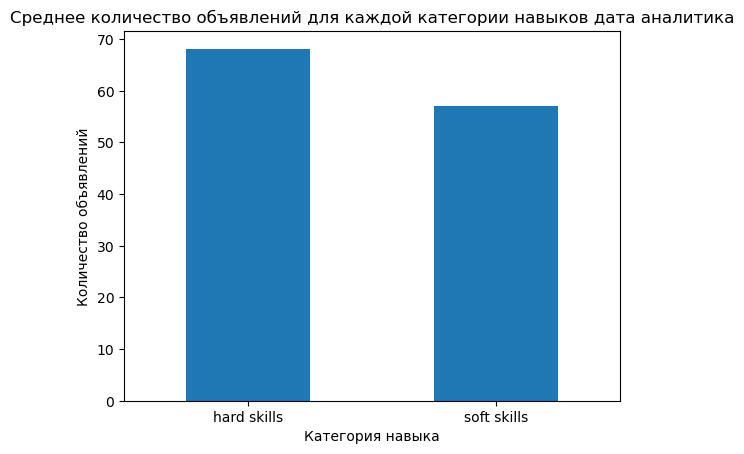

In [ ]:
skills_da_pivot.plot(kind = 'bar', y = ('mean','id'))
plt.xlabel('Категория навыка')
plt.ylabel('Количество объявлений')
plt.legend().remove()
plt.tick_params(axis = 'x', rotation = 0)
plt.title('Среднее количество объявлений для каждой категории навыков дата аналитика')
plt.show()

В среднем для каждого "жесткого" навыка дата аналитика приходится около 70 объявлений, для каждого "мягкого" - около 60.

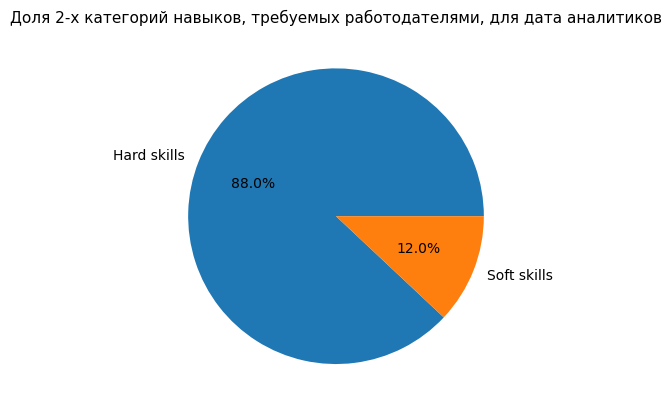

In [ ]:
skills_da_pivot.plot (kind = 'pie', y = ('sum','id'), labels = ['Hard skills', 'Soft skills'], autopct='%1.1f%%')
plt.ylabel('')
plt.legend().remove()
plt.title('Доля 2-х категорий навыков, требуемых работодателями, для дата аналитиков', fontsize = 11)
plt.show()

88% требуемых навыков в вакансиях - hard skills, 12% - soft skills.

Таким образом, несмотря на большое количество всевозможных "жестких" навыков, для работодателей важны также и "мягкие" навыки. Для системных аналитиков в большей степени, чем для аналитиков данных.

Определим для какой специальности и какого грейда требований больше. Для этого создадим в датафрейме столбец, в котором указано количество навыков для каждой вакансии из столбца "key_skills".

Сделаем это для системных аналитиков.

In [ ]:
#создаем новый столбец, в котором с помощью лямбда-функции посчитано количество элементов (т.е. навыков) из каждой ячейки столбца "key_skills"
df.loc[:,'skills_count'] = df.loc[:,'key_skills'].apply(lambda x: len(x))

In [ ]:
#проверяем работу функции
df.head()

,index,id,name,published_at,alternate_url,type,employer,department,area,experience,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_binary,skills_count
0,0,100046399,системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,юрент,NaN,Москва,Middle (3-6 years),...,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,<NA>,<NA>,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,системный аналитик,4
1,1,100050107,бизнес/системный аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,surf,NaN,Санкт-Петербург,Junior+ (1-3 years),...,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,<NA>,<NA>,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,системный аналитик,13
2,2,100059559,системный it аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,amarkets,NaN,Москва,Junior+ (1-3 years),...,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750,<NA>,ЗП не указана,NaN,NaN,Документация,системный аналитик,1
3,3,100063260,системный аналитик erp-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,астор,NaN,Москва,Senior (6+ years),...,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,<NA>,<NA>,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация,системный аналитик,9
4,4,100064793,системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,зетта страхование,NaN,Москва,Junior+ (1-3 years),...,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,<NA>,<NA>,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN,системный аналитик,9


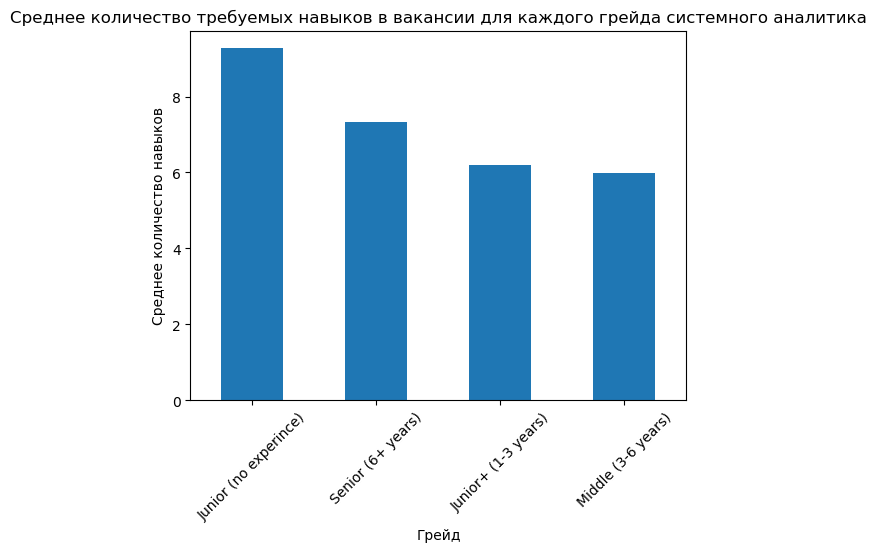

In [ ]:
#создаем сводную таблицу, в которой группируем данные по грейдам и считаем для каждого среднее количество объявлений
skills_by_grade_sa = df.query('name_binary == "системный аналитик"')
skills_by_grade_sa = skills_by_grade_sa.pivot_table(index = 'experience', values = 'skills_count', aggfunc = 'mean').sort_values(by = 'skills_count', ascending = False)
#создаем столбчатую диаграмму
skills_by_grade_sa.plot(kind = 'bar')
plt.title ('Среднее количество требуемых навыков в вакансии для каждого грейда системного аналитика')
plt.xlabel('Грейд')
plt.ylabel('Среднее количество навыков')
plt.tick_params(axis = 'x', rotation = 45)
plt.legend().remove()

Наибольшее количество навыков в среднем требуется для системных аналитиков без опыта работы (около 9 навыков), наименьшее - для "миддлов" (около 6 навыков).

Сделаем те же действия для аналитиков данных.

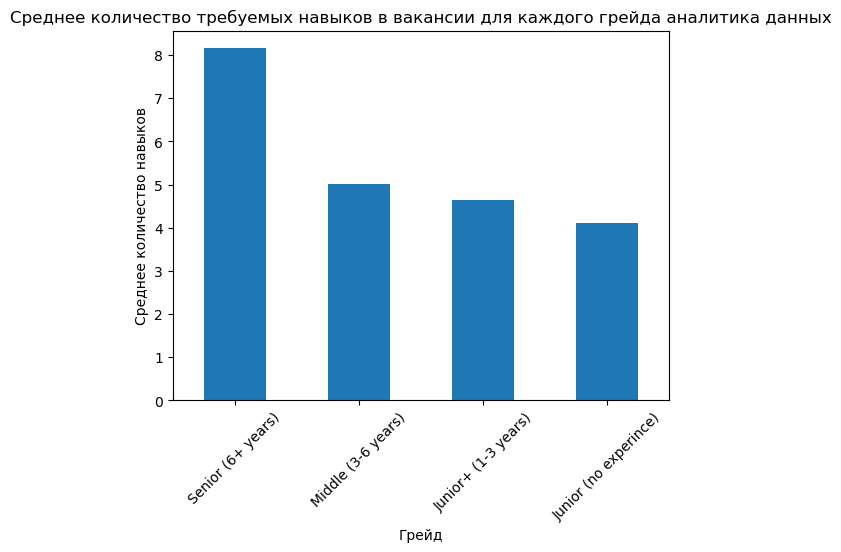

In [ ]:
skills_by_grade_da = df.query('name_binary == "аналитик данных"')
skills_by_grade_da = skills_by_grade_da.pivot_table(index = 'experience', values = 'skills_count', aggfunc = 'mean').sort_values(by = 'skills_count', ascending = False)
skills_by_grade_da.plot(kind = 'bar')
plt.title ('Среднее количество требуемых навыков в вакансии для каждого грейда аналитика данных')
plt.xlabel('Грейд')
plt.ylabel('Среднее количество навыков')
plt.tick_params(axis = 'x', rotation = 45)
plt.legend().remove()

Для дата аналитиков чем больше у тебя опыт, тем больше навыков от тебя требуется. От "сеньоров" в среднем требуется 8 навыков, для аналитиков без опыта - примерно 4.

Для аналитиков важны как "жесткие", так и "мягкие" навыки. Для системных аналитиков последние важны в большей степени, особенно навык работы с документацией.
Требования к количеству навыков у двух специальностей различаются: наибольшее количество навыков требуется от начинающих системных аналитиков, тогда как у аналитиков данных, наоборот, чем больше опыт, тем больше навыков требуется.

# Самые важные навыки

Определим самые важные навыки для аналитиков с разбивкой по грейдам.

Посмотрим самые важные soft skills системных аналитиков. Для этого создадим сводную таблицу, в которой будет указано количество каждого "мягкого навыка" для системных аналитиков.

In [ ]:
df_exploded_sa.loc[:,'skill_category'] = df_exploded_sa.loc[:,'key_skills'].apply(categorize_skills_sa)

C:\Users\Ilya\AppData\Local\Temp\ipykernel_13160\2679693116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exploded_sa.loc[:,'skill_category'] = df_exploded_sa.loc[:,'key_skills'].apply(categorize_skills_sa)


In [ ]:
top_soft_skills_by_grade_sa = df_exploded_sa.query('skill_category == "Soft skills"').pivot_table(index = 'key_skills', columns = 'experience', values = 'id', aggfunc = 'count')
top_soft_skills_by_grade_sa = top_soft_skills_by_grade_sa.query('key_skills!=""')

Создадим цикл, в котором для каждого грейда будет создан отдельный датафрейм с 5-ю самыми часто встречаемыми навыками, а на основе датафрейма создадим график.

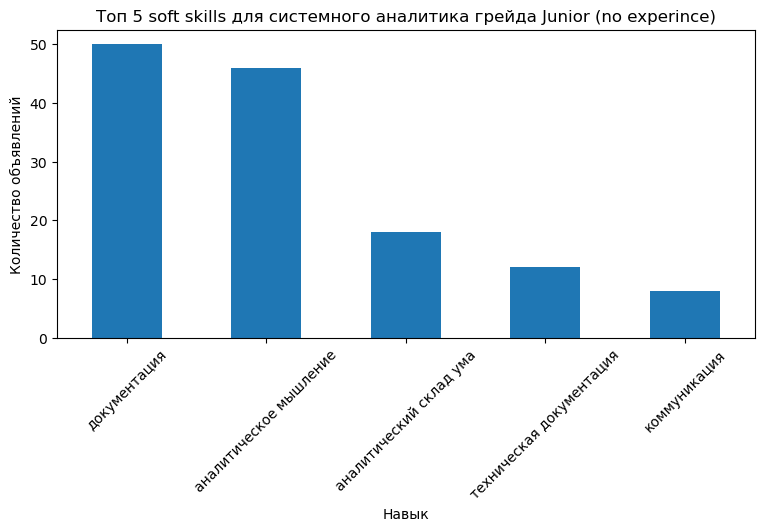

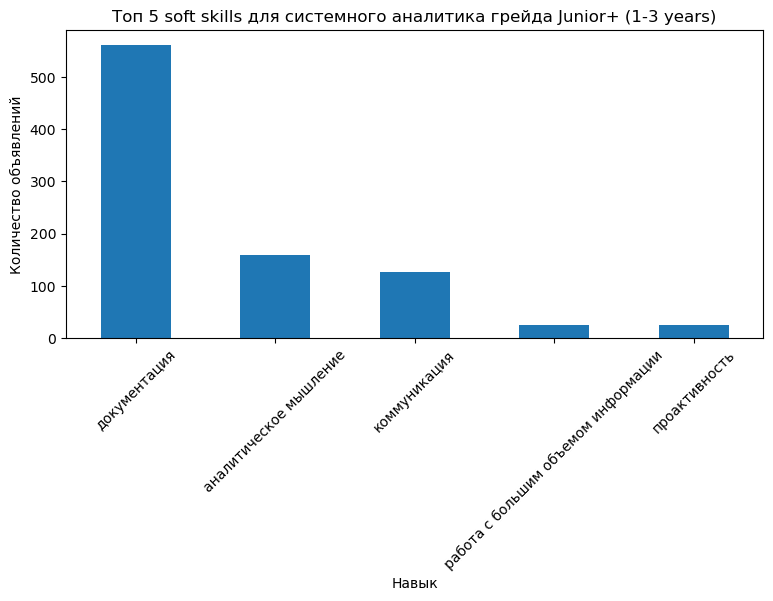

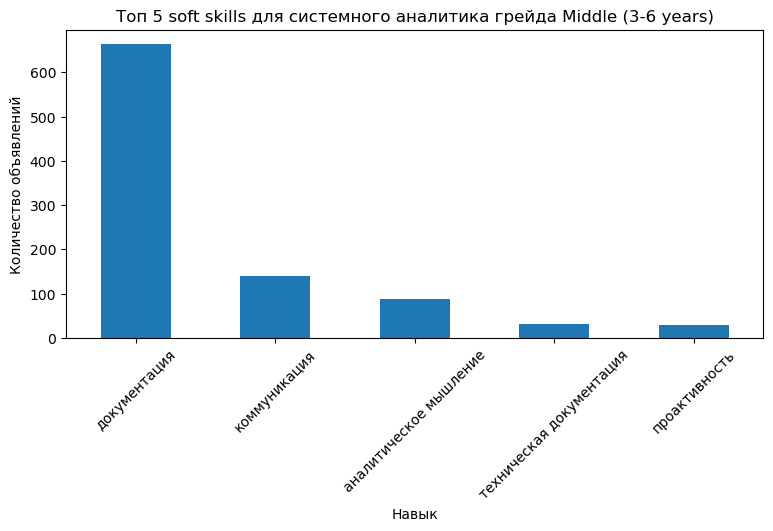

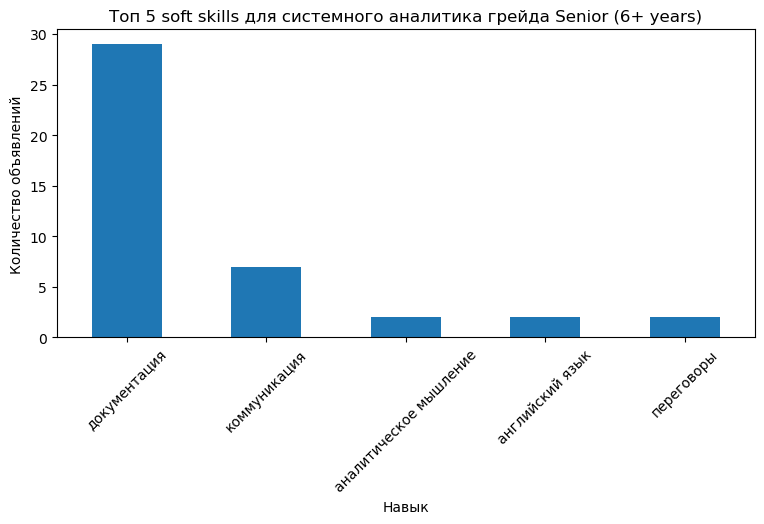

In [ ]:
for column in top_soft_skills_by_grade_sa.columns:
    top_skills = top_soft_skills_by_grade_sa.sort_values (by = column, ascending = False).head(5)
    top_skills.plot(kind = 'bar', y = column, figsize = (9,4))
    plt.xlabel('Навык')
    plt.ylabel('Количество объявлений')
    plt.legend().remove()
    plt.tick_params(axis = 'x', rotation = 45)
    plt.title(f'Топ 5 soft skills для системного аналитика грейда {column}')

5 самых требуемых soft skills для системных аналитиков представлены на графиках. Следует отметить, что для каждого грейда основным "мягким" навыком является работа с документацией.

Рассмотрим самые важные hard skills системных аналитиков.

In [ ]:
top_hard_skills_by_grade_sa = df_exploded_sa.query('skill_category == "Hard skills"').pivot_table(index = 'key_skills', columns = 'experience', values = 'id', aggfunc = 'count')
top_hard_skills_by_grade_sa = top_hard_skills_by_grade_sa.query('key_skills!=""')

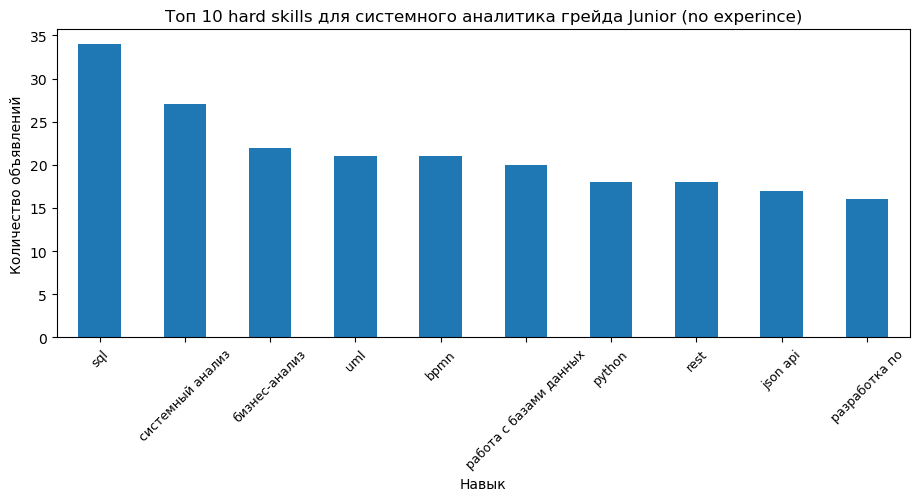

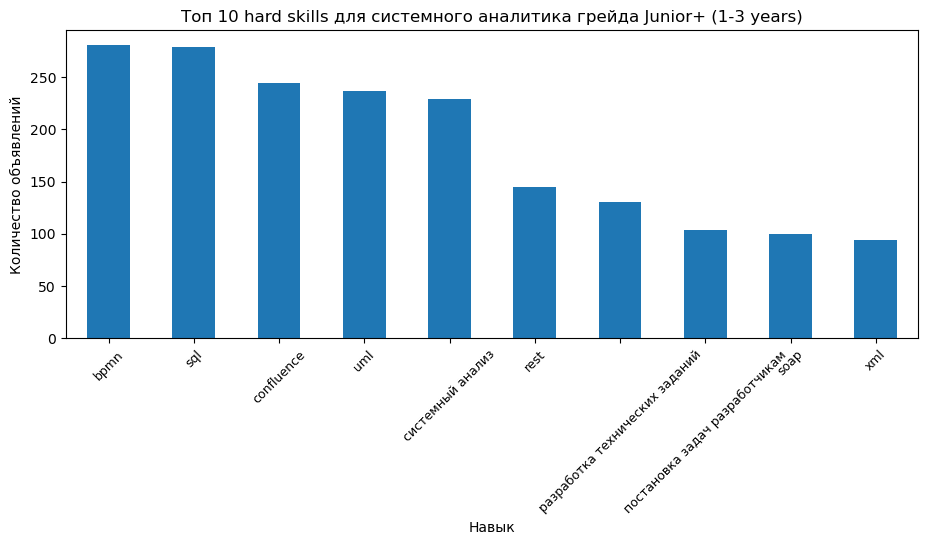

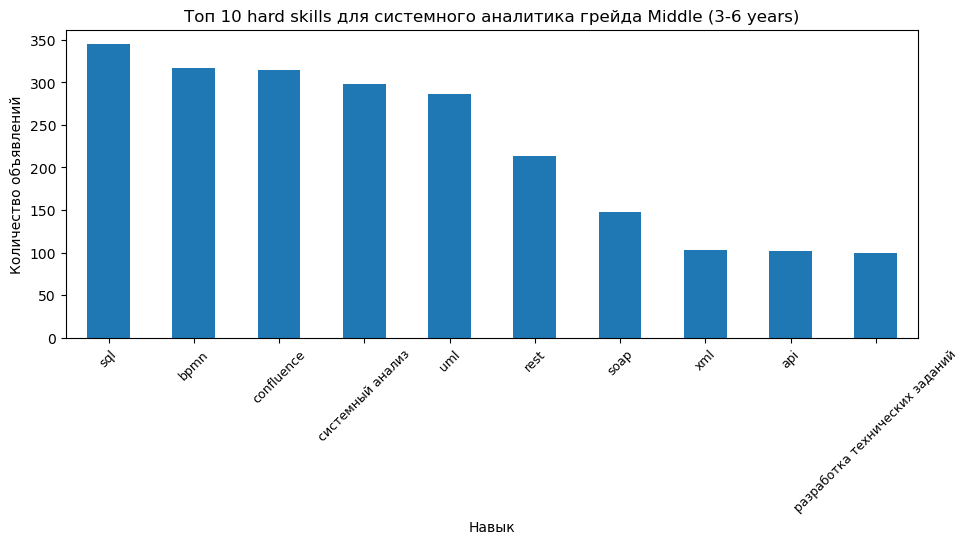

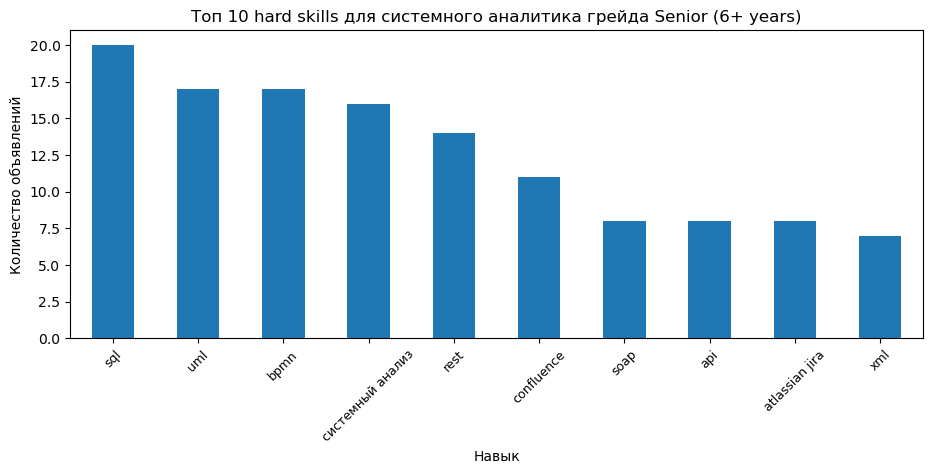

In [ ]:
for column in top_hard_skills_by_grade_sa.columns:
    top_skills = top_hard_skills_by_grade_sa.sort_values (by = column, ascending = False).head(10)
    top_skills.plot(kind = 'bar', y = column, figsize = (11,4))
    plt.xlabel('Навык')
    plt.ylabel('Количество объявлений')
    plt.legend().remove()
    plt.tick_params(axis = 'x', rotation = 45, labelsize = 9)
    plt.title(f'Топ 10 hard skills для системного аналитика грейда {column}')

Самые важные hard skills для системных аналитиков каждого грейда представлены на экране.

Сделаем то же самое для аналитиков данных.

Создадим графики с пятью самыми важными soft skills каждого грейда.

In [ ]:
df_exploded_da['skill_category'] = df_exploded_da['key_skills'].apply(categorize_skills_da)
top_soft_skills_by_grade_da = df_exploded_da.query('skill_category == "soft skills"').pivot_table(index = 'key_skills', columns = 'experience', values = 'id', aggfunc = 'count')
top_soft_skills_by_grade_da = top_soft_skills_by_grade_da.query('key_skills!=""')

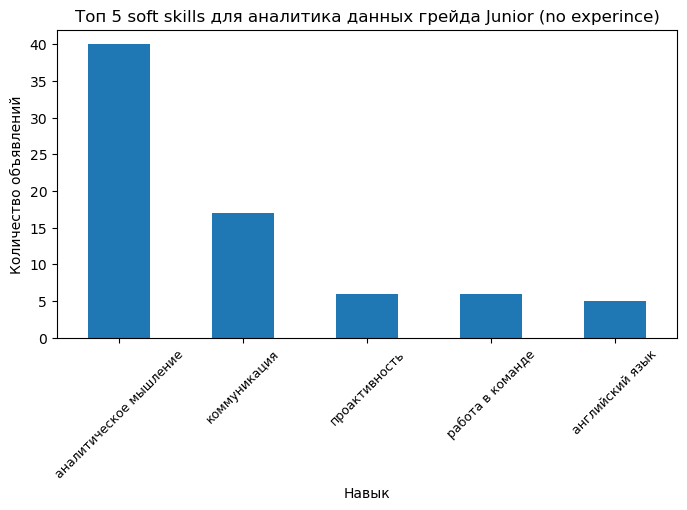

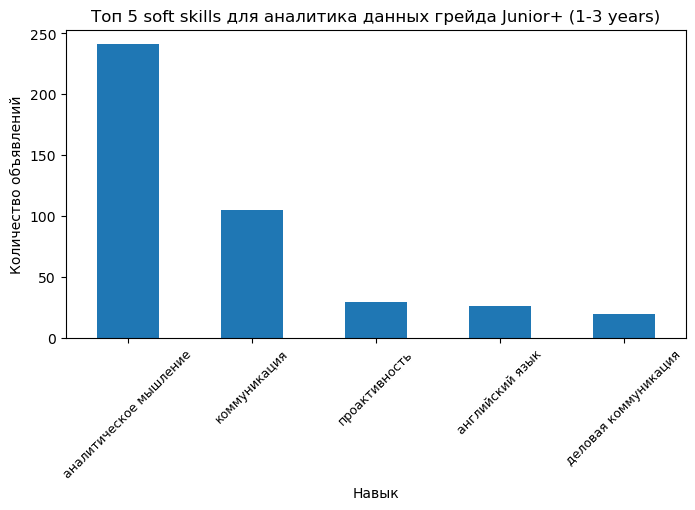

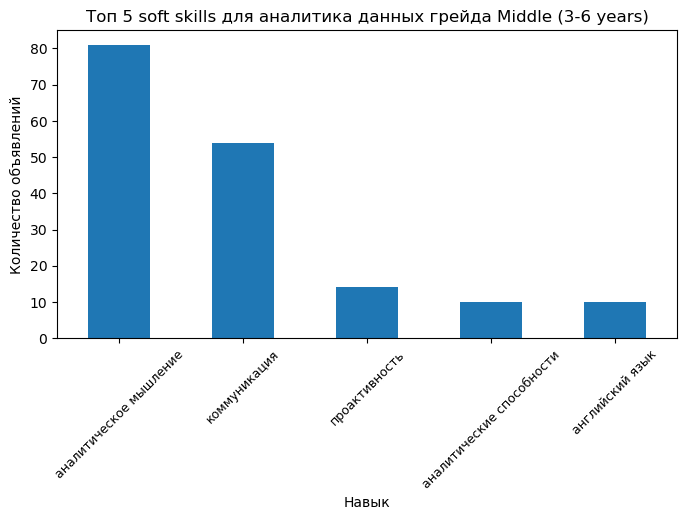

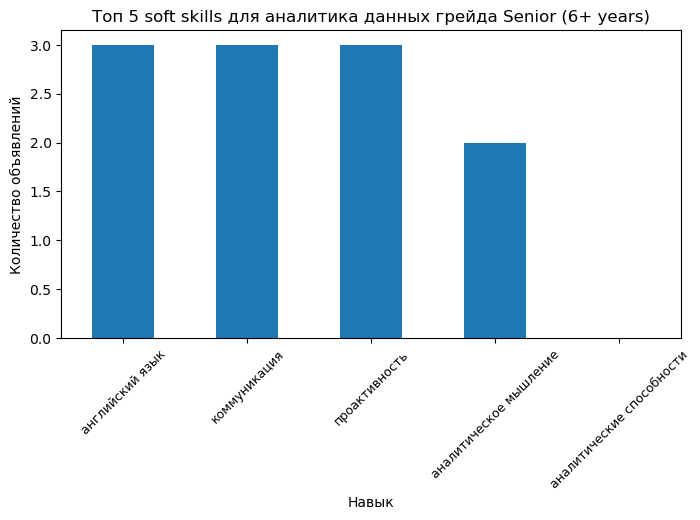

In [ ]:
for column in top_soft_skills_by_grade_da.columns:
    top_skills_da = top_soft_skills_by_grade_da.sort_values (by = column, ascending = False).head(5)
    top_skills_da.plot(kind = 'bar', y = column, figsize = (8,4))
    plt.xlabel('Навык')
    plt.ylabel('Количество объявлений')
    plt.legend().remove()
    plt.tick_params(axis = 'x', rotation = 45, labelsize = 9)
    plt.title(f'Топ 5 soft skills для аналитика данных грейда {column}')
    plt.show()

Главные "мягкие" навыки для аналитиков данных каждого грейда представлены на экране. Особое значение имеют такие навыки как аналитический склад ума и коммуникация.

Создадим графики с пятью самыми важными hard skills каждого грейда.

In [ ]:
top_hard_skills_by_grade_da = df_exploded_da.query('skill_category == "hard skills"').pivot_table(index = 'key_skills', columns = 'experience', values = 'id', aggfunc = 'count')
top_hard_skills_by_grade_da = top_hard_skills_by_grade_da.query('key_skills!=""')

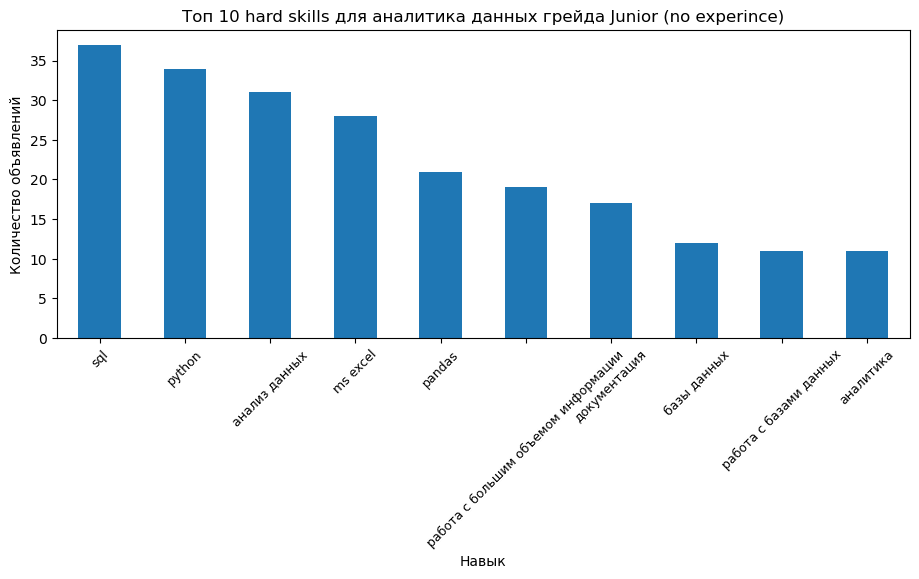

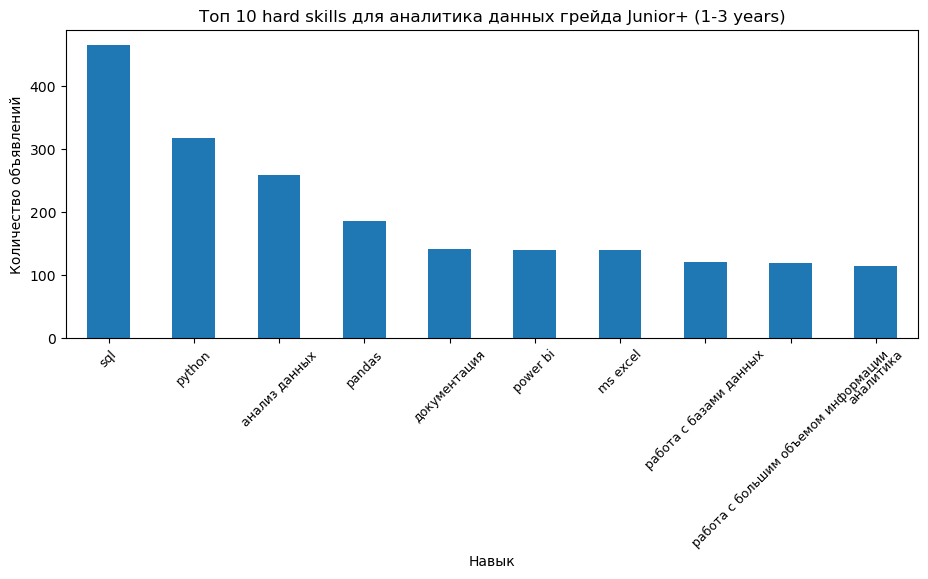

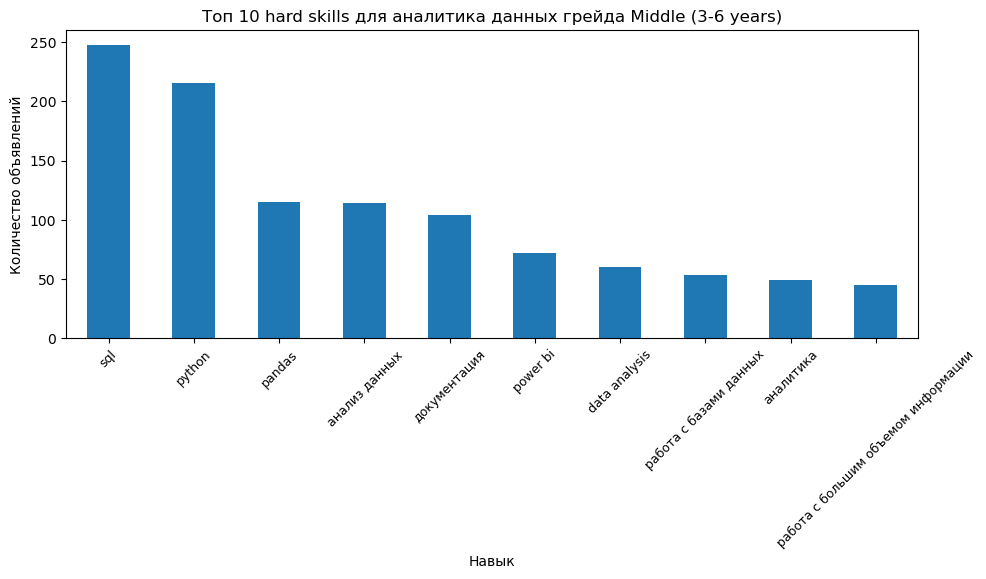

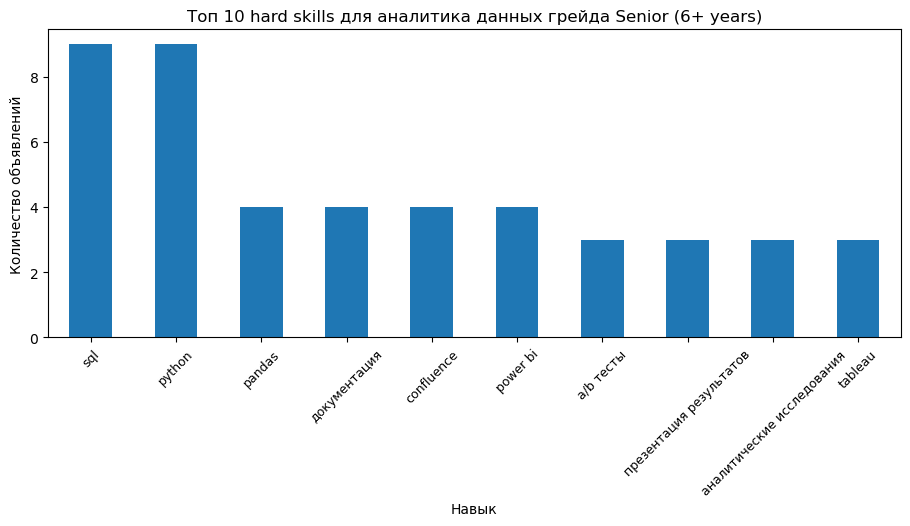

In [ ]:
for column in top_hard_skills_by_grade_da.columns:
    top_skills_da = top_hard_skills_by_grade_da.sort_values (by = column, ascending = False).head(10)
    top_skills_da.plot(kind = 'bar', y = column, figsize = (11,4))
    plt.xlabel('Навык')
    plt.ylabel('Количество объявлений')
    plt.legend().remove()
    plt.tick_params(axis = 'x', rotation = 45, labelsize = 9)
    plt.title(f'Топ 10 hard skills для аналитика данных грейда {column}')
    plt.show()

10 самых важных "жестких" навыков для дата аналитиков представлены на экране. Особое значение имеют SQL, python и pandas.

Наиболее важные навыки различаются для каждой специальности, но внутри них основные требуемые навыки сильно не меняются в зависимости от грейда.

# Выводы и рекоммендации

Таким образом, предлагаемые на HH.ru вакансии для аналитиков данных и системных аналитиков имеют как общие черты, так и отличия.

Основной набор объявлений направлен на поиск специалистов Junior+ и Middle, готовых работать полный рабочий день.

Основные работодатели отличаются, но компания Сбер ищет активно как системных аналитиков, так и аналитиков данных.

Зарплаты системных аналитиков, как правило выше, чем у аналитиков данных.

Для обоих специальностей важны как "мягкие", так и "жесткие" навыки, но для системных аналитиков "мягкие" навыки важны в большей мере, чем для аналитиков данных.
Для системных аналитиков важны такие soft skills как работа с документацией коммуникация и др. Для аналитиков данных важны аналитический склад ума, коммуникация, проактивность и другие.
Важные hard skills для системных аналитиков: SQL, BPMN, confluence и др. Для дата аналитиков важнейшими "жесткими" навыками являются SQL, python, pandas и другие.

<div class="alert alert-success">

**✅Комментарий ревьюера**

Илья, хорошо справился с проектом.
Понравилось то, что код аккуратный, выдержана четкая структура проекта. Есть промежуточные и итоговые выводы.

Хорошая визуализация результатов, но ее можно сделать компактнее. Рекомендую познакомиться с методом `subplot` скидывал ссылку на него выше в комментариях.

Навыки изучил хорошо. Молодец, что разделил их на харды и софты. Здорово, что показал не только список навыков, но и постарался посмотреть на распределениях и среднее кол-во вакансий


</div>
